In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
data = pd.read_csv('/home/binit/HistoryOfNepal/Amusement_Park_ABC_Data.xlsx - Amusement_Park_Data.csv')
data.head(10)

,Date,Visitor_ID,Geographic_Origin,Age,Gender,Location,Ticket Type,Ticket Price per Visitor,No of Visitors,Type_of_Ride_Preferred,Accompanied_by_Children,Number_of_Rides_Played,Check_In_Time,Check_Out_Time,Visitor_Satisfaction,Ride_Quality_Rating,Cleanliness_Rating,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,4/11/2022,V100000,Local,20,Female,China,Fast Track,3200,6,Water Slides,Yes,12,10:05,15:13,3.9,2.0,3.6,NaN,NaN,NaN
1,26/2/2023,V100001,International,34,Male,China,Regular,2000,6,Swing Rides,Yes,7,11:35,18:46,4.8,2.6,3.7,NaN,NaN,NaN
2,23/6/2020,V100002,Domestic,31,Female,Nepal,Fast Track,1500,3,Drop Towers,Yes,9,13:16,19:00,3.9,3.8,3.3,NaN,NaN,NaN
3,21/5/2022,V100003,Domestic,31,Male,Nepal,Regular,1500,6,Bumper Cars,No,3,12:30,16:42,4.5,2.4,4.4,NaN,NaN,NaN
4,4/6/2023,V100004,International,32,Male,Singapore,Regular,1800,4,Ferris Wheels,Yes,5,12:18,16:19,4.1,2.2,3.7,NaN,NaN,NaN
5,17/2/2022,V100005,Domestic,22,Male,Nepal,Regular,1500,6,Water Slides,Yes,12,11:52,18:46,3.9,2.7,5.0,NaN,NaN,NaN
6,3/11/2023,V100006,Domestic,20,Male,Singapore,Fast Track,3000,6,Ferris Wheels,No,5,13:56,14:09,3.9,3.1,4.4,NaN,NaN,NaN
7,10/9/2018,V100007,Local,33,Female,China,Fast Track,2000,2,Ferris Wheels,No,10,13:19,17:35,4.3,2.5,3.6,NaN,NaN,NaN
8,4/4/2018,V100008,Domestic,29,Male,China,Fast Track,2000,6,Water Slides,No,10,12:07,15:25,4.5,2.6,5.0,NaN,NaN,NaN
9,5/6/2018,V100009,Local,31,Female,Singapore,Regular,1200,4,Roller Coasters,No,6,10:02,15:40,4.5,3.0,3.1,NaN,NaN,NaN


In [165]:
data.columns

Index(['Date', 'Visitor_ID', 'Geographic_Origin', 'Age', 'Gender', 'Location',
       'Ticket Type', 'Ticket Price per Visitor', 'No of Visitors',
       'Type_of_Ride_Preferred', 'Accompanied_by_Children',
       'Number_of_Rides_Played', 'Check_In_Time', 'Check_Out_Time',
       'Visitor_Satisfaction', 'Ride_Quality_Rating', 'Cleanliness_Rating',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [166]:
data.isnull().sum()

Date                            0
Visitor_ID                      0
Geographic_Origin               0
Age                             0
Gender                          0
Location                        0
Ticket Type                     0
Ticket Price per Visitor        0
No of Visitors                  0
Type_of_Ride_Preferred          0
Accompanied_by_Children         0
Number_of_Rides_Played          0
Check_In_Time                   0
Check_Out_Time                  0
Visitor_Satisfaction            0
Ride_Quality_Rating             0
Cleanliness_Rating              0
Unnamed: 17                 70523
Unnamed: 18                 70522
Unnamed: 19                 70522
dtype: int64

In [167]:
data = data.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Visitor_ID'])
data

,Date,Geographic_Origin,Age,Gender,Location,Ticket Type,Ticket Price per Visitor,No of Visitors,Type_of_Ride_Preferred,Accompanied_by_Children,Number_of_Rides_Played,Check_In_Time,Check_Out_Time,Visitor_Satisfaction,Ride_Quality_Rating,Cleanliness_Rating
0,4/11/2022,Local,20,Female,China,Fast Track,3200,6,Water Slides,Yes,12,10:05,15:13,3.9,2.0,3.6
1,26/2/2023,International,34,Male,China,Regular,2000,6,Swing Rides,Yes,7,11:35,18:46,4.8,2.6,3.7
2,23/6/2020,Domestic,31,Female,Nepal,Fast Track,1500,3,Drop Towers,Yes,9,13:16,19:00,3.9,3.8,3.3
3,21/5/2022,Domestic,31,Male,Nepal,Regular,1500,6,Bumper Cars,No,3,12:30,16:42,4.5,2.4,4.4
4,4/6/2023,International,32,Male,Singapore,Regular,1800,4,Ferris Wheels,Yes,5,12:18,16:19,4.1,2.2,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70518,23/8/2023,Local,27,female,Singapore,Regular,1800,4,Ferris Wheels,No,9,11:45,18:28,2.8,2.8,3.1
70519,13/1/2020,Local,22,male,Nepal,Fast Track,1500,4,Bumper Cars,Yes,7,13:12,17:16,2.9,4.4,4.2
70520,26/8/2023,Local,24,female,Nepal,Regular,1500,2,Roller Coasters,Yes,9,11:02,18:00,2.5,3.3,4.3
70521,11/6/2020,Local,25,male,Nepal,Fast Track,1500,2,Water Slides,Yes,8,10:19,16:19,2.8,2.7,2.1


#key takeaways 
Ages with Higher Visitors:

Ages 22 to 28 appear to have the highest number of visitors across all rides.
These bars are taller, showing that more visitors fall in this age range.
Most Popular Ride Types:

The larger contributions from Water Slides (green) and Drop Towers (purple) suggest these rides are consistently preferred across ages.
Age-Specific Insights:

Ages 18–22 show a relatively high frequency for certain rides like Roller Coasters (yellow) and Bumper Cars (red).
Ages 30+ have a noticeable drop in participation across all rides, which could suggest less interest from older age groups.


In [168]:
data.to_csv('Amusement_Park_Data.csv', index=False)

In [169]:
#Lowest satisfaction

location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
lowest_satisfaction_location = location_satisfaction.loc[location_satisfaction['Visitor_Satisfaction'].idxmin()]
print("Location with the lowest customer satisfaction:")
print(f"Location: {lowest_satisfaction_location['Location']}")
print(f"Average Satisfaction Score: {lowest_satisfaction_location['Visitor_Satisfaction']}")

#highest satisfaction
location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
location_satisfaction = location_satisfaction.sort_values(by='Visitor_Satisfaction', ascending=False)
highest_satisfaction_location = location_satisfaction.head(1)

print("Location with the highest customer satisfaction:")
print(f"Location: {highest_satisfaction_location['Location'].values[0]}")
print(f"Average Satisfaction Score: {highest_satisfaction_location['Visitor_Satisfaction'].values[0]}")

Location with the lowest customer satisfaction:
Location: Singapore
Average Satisfaction Score: 3.855234305549676
Location with the highest customer satisfaction:
Location: Nepal
Average Satisfaction Score: 3.8604930924548357


In [170]:
location_ride_quality = data.groupby('Location')['Ride_Quality_Rating'].mean().reset_index()
location_ride_quality = location_ride_quality.sort_values(by='Ride_Quality_Rating', ascending=False)
highest_ride_quality = location_ride_quality.head(1)
lowest_ride_quality = location_ride_quality.tail(1)
print("Location with the highest ride quality:")
print(f"Location: {highest_ride_quality['Location'].values[0]}")
print(f"Average Ride Quality Rating: {highest_ride_quality['Ride_Quality_Rating'].values[0]:.2f}")

print("\nLocation with the lowest ride quality:")
print(f"Location: {lowest_ride_quality['Location'].values[0]}")
print(f"Average Ride Quality Rating: {lowest_ride_quality['Ride_Quality_Rating'].values[0]:.2f}")


Location with the highest ride quality:
Location: Singapore
Average Ride Quality Rating: 3.50

Location with the lowest ride quality:
Location: China
Average Ride Quality Rating: 3.49


In [171]:
#cleanliness 
location_cleanliness = data.groupby('Location')['Cleanliness_Rating'].mean().reset_index()
location_cleanliness = location_cleanliness.sort_values(by='Cleanliness_Rating', ascending=False)
highest_cleanliness = location_cleanliness.head(1)
lowest_cleanliness = location_cleanliness.tail(1)
print("Location with the highest cleanliness rating:")
print(f"Location: {highest_cleanliness['Location'].values[0]}")
print(f"Average Cleanliness Rating: {highest_cleanliness['Cleanliness_Rating'].values[0]:.2f}")

print("\nLocation with the lowest cleanliness rating:")
print(f"Location: {lowest_cleanliness['Location'].values[0]}")
print(f"Average Cleanliness Rating: {lowest_cleanliness['Cleanliness_Rating'].values[0]:.2f}")

Location with the highest cleanliness rating:
Location: China
Average Cleanliness Rating: 3.86

Location with the lowest cleanliness rating:
Location: Nepal
Average Cleanliness Rating: 3.85


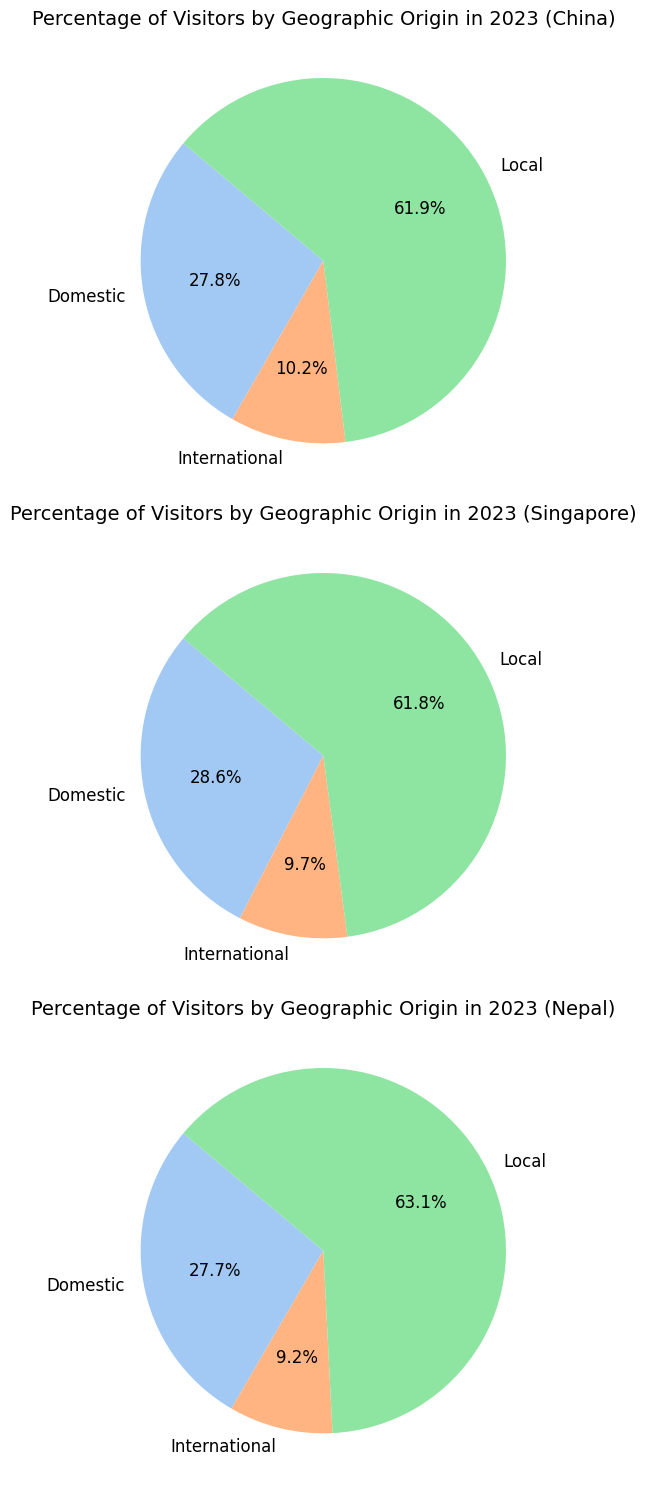

In [172]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Aggregate total visitors by geographic origin for 2023
geo_visitors_2023 = data_2023.groupby('Geographic_Origin').size().reset_index(name='Visitor_Count')

# Sort geographic origins by visitor count in descending order
geo_visitors_2023 = geo_visitors_2023.sort_values('Visitor_Count', ascending=False)

# Visualize geographic origin data for each location in 2023 using pie charts
locations = data_2023['Location'].unique()
plt.figure(figsize=(15, 15))

for i, location in enumerate(locations, start=1):
    plt.subplot(len(locations), 1, i)
    location_data = data_2023[data_2023['Location'] == location]
    geo_location_visitors = location_data.groupby('Geographic_Origin').size().reset_index(name='Visitor_Count')
    plt.pie(
        geo_location_visitors['Visitor_Count'], 
        labels=geo_location_visitors['Geographic_Origin'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel', len(geo_location_visitors)),
        textprops={'fontsize': 12}
    )
    plt.title(f'Percentage of Visitors by Geographic Origin in 2023 ({location})', fontsize=14)

plt.tight_layout()
plt.show()

In [173]:
# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Aggregate data to include total, local, domestic, and international visitors by location
visitor_details = data.groupby(['Location', 'Geographic_Origin']).size().reset_index(name='Visitor_Count')

# Calculate totals for each location
visitor_summary = visitor_details.pivot(index='Location', columns='Geographic_Origin', values='Visitor_Count').fillna(0)
visitor_summary['Total_Visitors'] = visitor_summary.sum(axis=1)

# Reset index for better readability
visitor_summary = visitor_summary.reset_index()

# Rank locations based on total visitors in descending order
visitor_summary = visitor_summary.sort_values(by='Total_Visitors', ascending=False).reset_index(drop=True)

visitor_summary


Geographic_Origin,Location,Domestic,International,Local,Total_Visitors
0,Singapore,5022,1651,16950,23623
1,Nepal,5130,1634,16761,23525
2,China,4896,1701,16778,23375


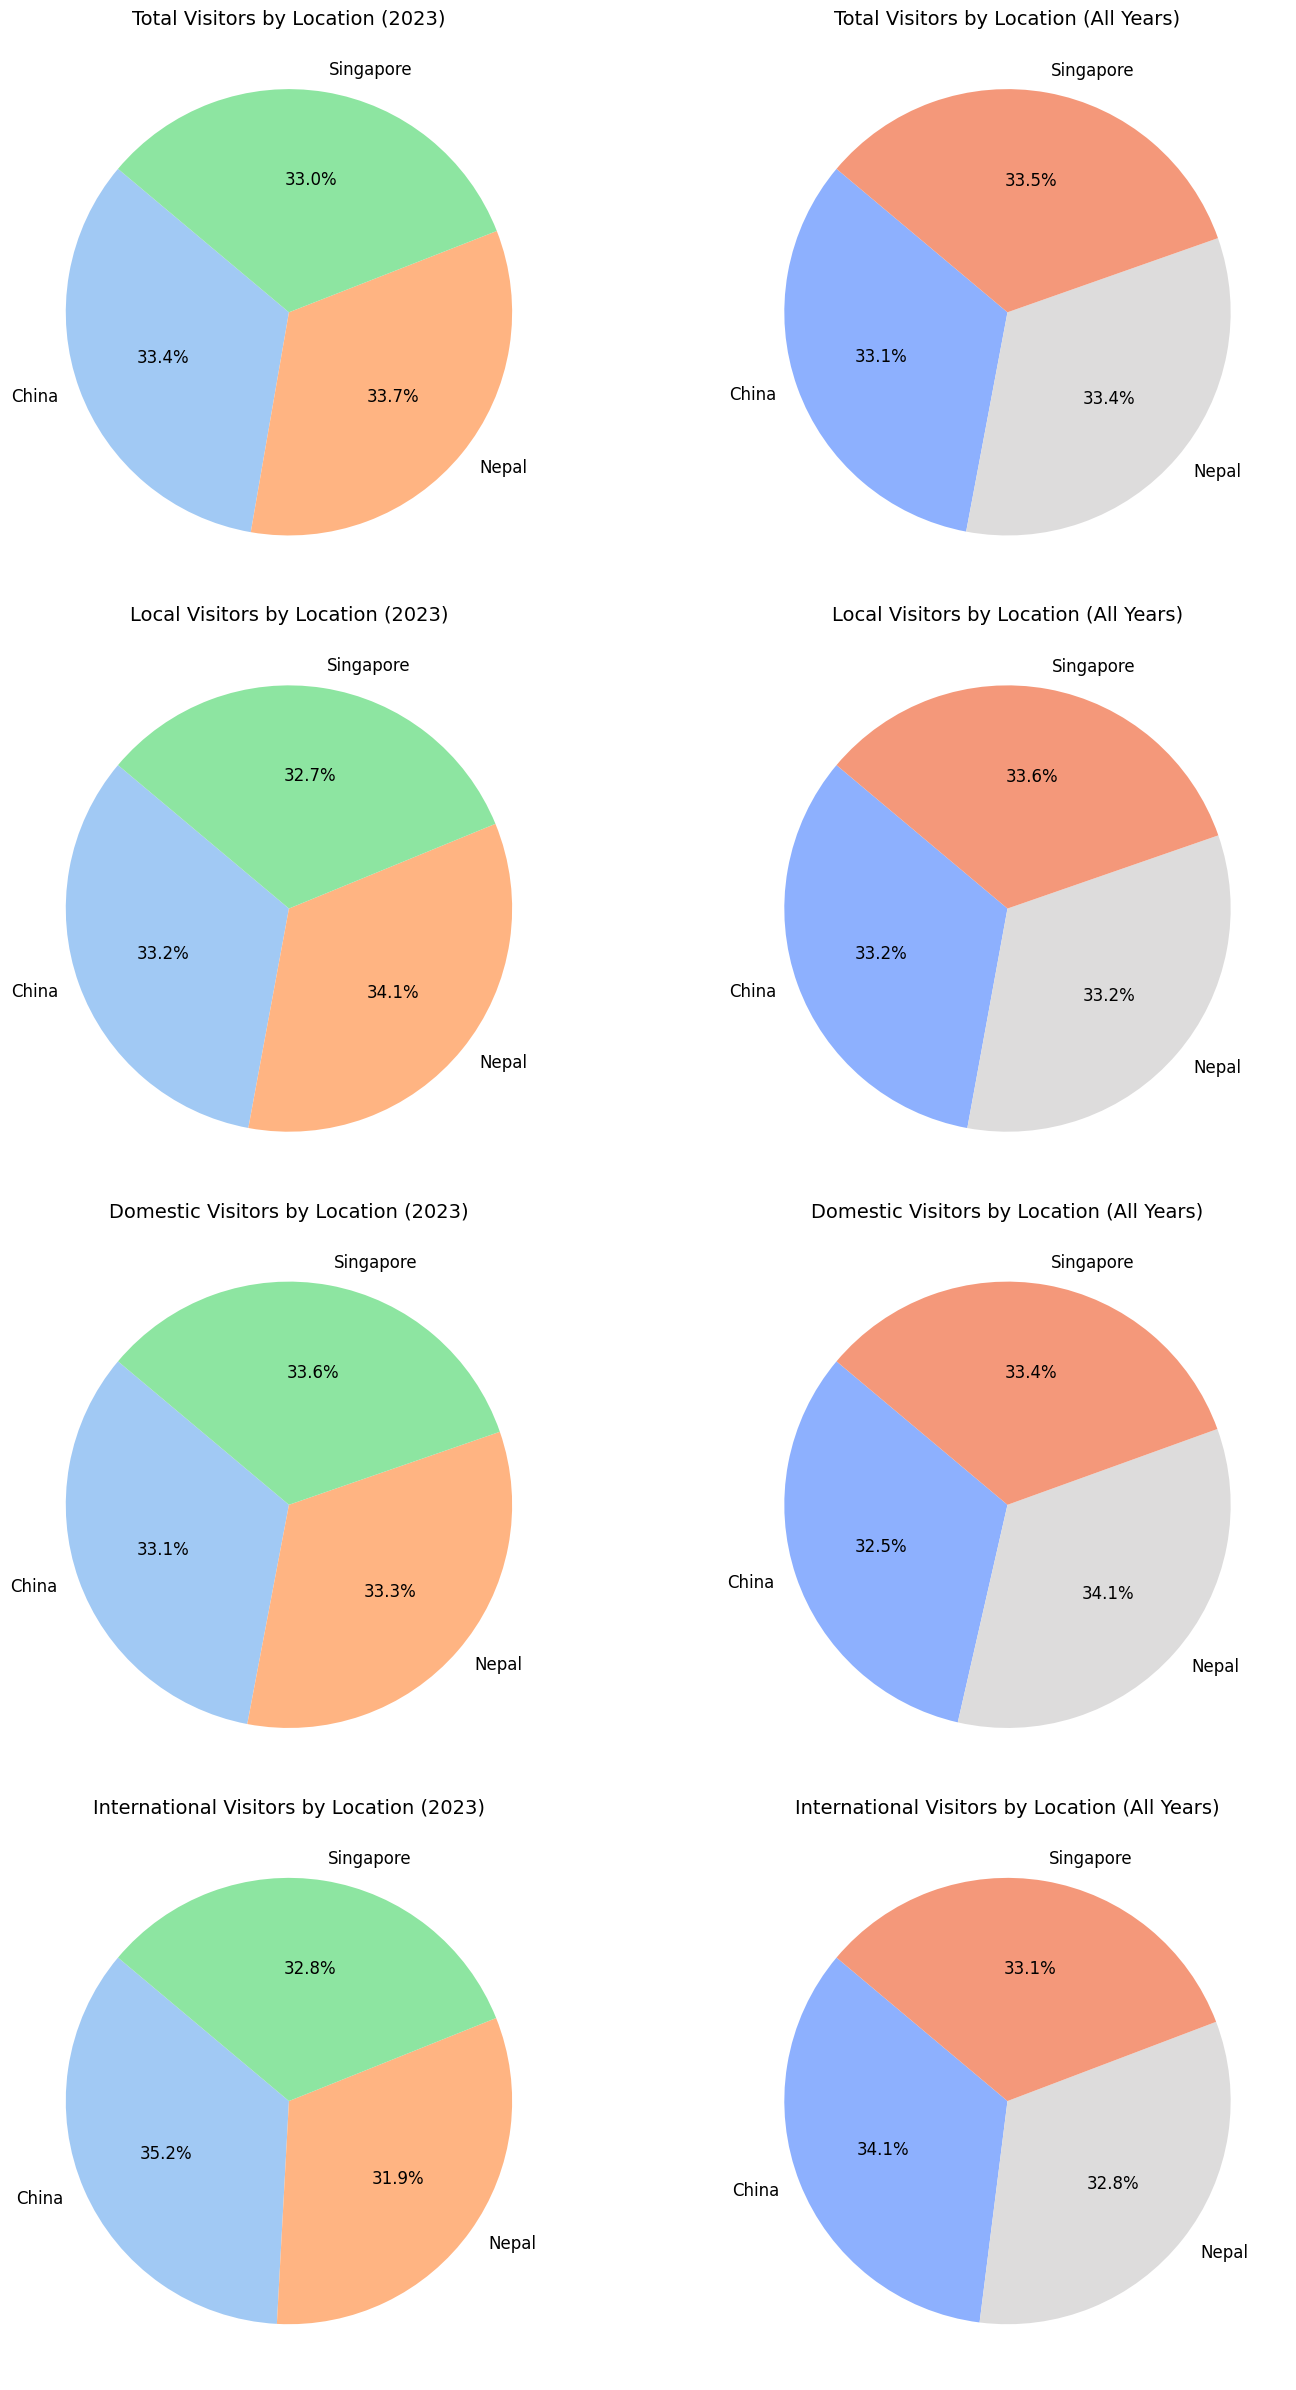

In [174]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Aggregate data to include total, local, domestic, and international visitors by location
visitor_details = data.groupby(['Location', 'Geographic_Origin']).size().reset_index(name='Visitor_Count')

# Calculate totals for each location for all years
visitor_summary_all_years = visitor_details.pivot(index='Location', columns='Geographic_Origin', values='Visitor_Count').fillna(0)
visitor_summary_all_years['Total_Visitors'] = visitor_summary_all_years.sum(axis=1)
visitor_summary_all_years = visitor_summary_all_years.reset_index()

# Calculate totals for each location for 2023
visitor_details_2023 = data_2023.groupby(['Location', 'Geographic_Origin']).size().reset_index(name='Visitor_Count')
visitor_summary_2023 = visitor_details_2023.pivot(index='Location', columns='Geographic_Origin', values='Visitor_Count').fillna(0)
visitor_summary_2023['Total_Visitors'] = visitor_summary_2023.sum(axis=1)
visitor_summary_2023 = visitor_summary_2023.reset_index()

# Create pie charts for total visitors, local, domestic, and international for 2023 and all years
fig, axes = plt.subplots(4, 2, figsize=(16, 24))

# Total Visitors
axes[0, 0].pie(
    visitor_summary_2023['Total_Visitors'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[0, 0].set_title('Total Visitors by Location (2023)', fontsize=14)

axes[0, 1].pie(
    visitor_summary_all_years['Total_Visitors'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[0, 1].set_title('Total Visitors by Location (All Years)', fontsize=14)

# Local Visitors
axes[1, 0].pie(
    visitor_summary_2023['Local'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[1, 0].set_title('Local Visitors by Location (2023)', fontsize=14)

axes[1, 1].pie(
    visitor_summary_all_years['Local'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[1, 1].set_title('Local Visitors by Location (All Years)', fontsize=14)

# Domestic Visitors
axes[2, 0].pie(
    visitor_summary_2023['Domestic'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[2, 0].set_title('Domestic Visitors by Location (2023)', fontsize=14)

axes[2, 1].pie(
    visitor_summary_all_years['Domestic'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[2, 1].set_title('Domestic Visitors by Location (All Years)', fontsize=14)

# International Visitors
axes[3, 0].pie(
    visitor_summary_2023['International'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[3, 0].set_title('International Visitors by Location (2023)', fontsize=14)

axes[3, 1].pie(
    visitor_summary_all_years['International'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[3, 1].set_title('International Visitors by Location (All Years)', fontsize=14)

plt.tight_layout()
plt.show()




In [175]:
visitor_summary_2023.head()


Geographic_Origin,Location,Domestic,International,Local,Total_Visitors
0,China,1500,552,3340,5392
1,Nepal,1508,500,3432,5440
2,Singapore,1521,514,3289,5324


In [176]:
visitor_summary_all_years.head()

Geographic_Origin,Location,Domestic,International,Local,Total_Visitors
0,China,4896,1701,16778,23375
1,Nepal,5130,1634,16761,23525
2,Singapore,5022,1651,16950,23623


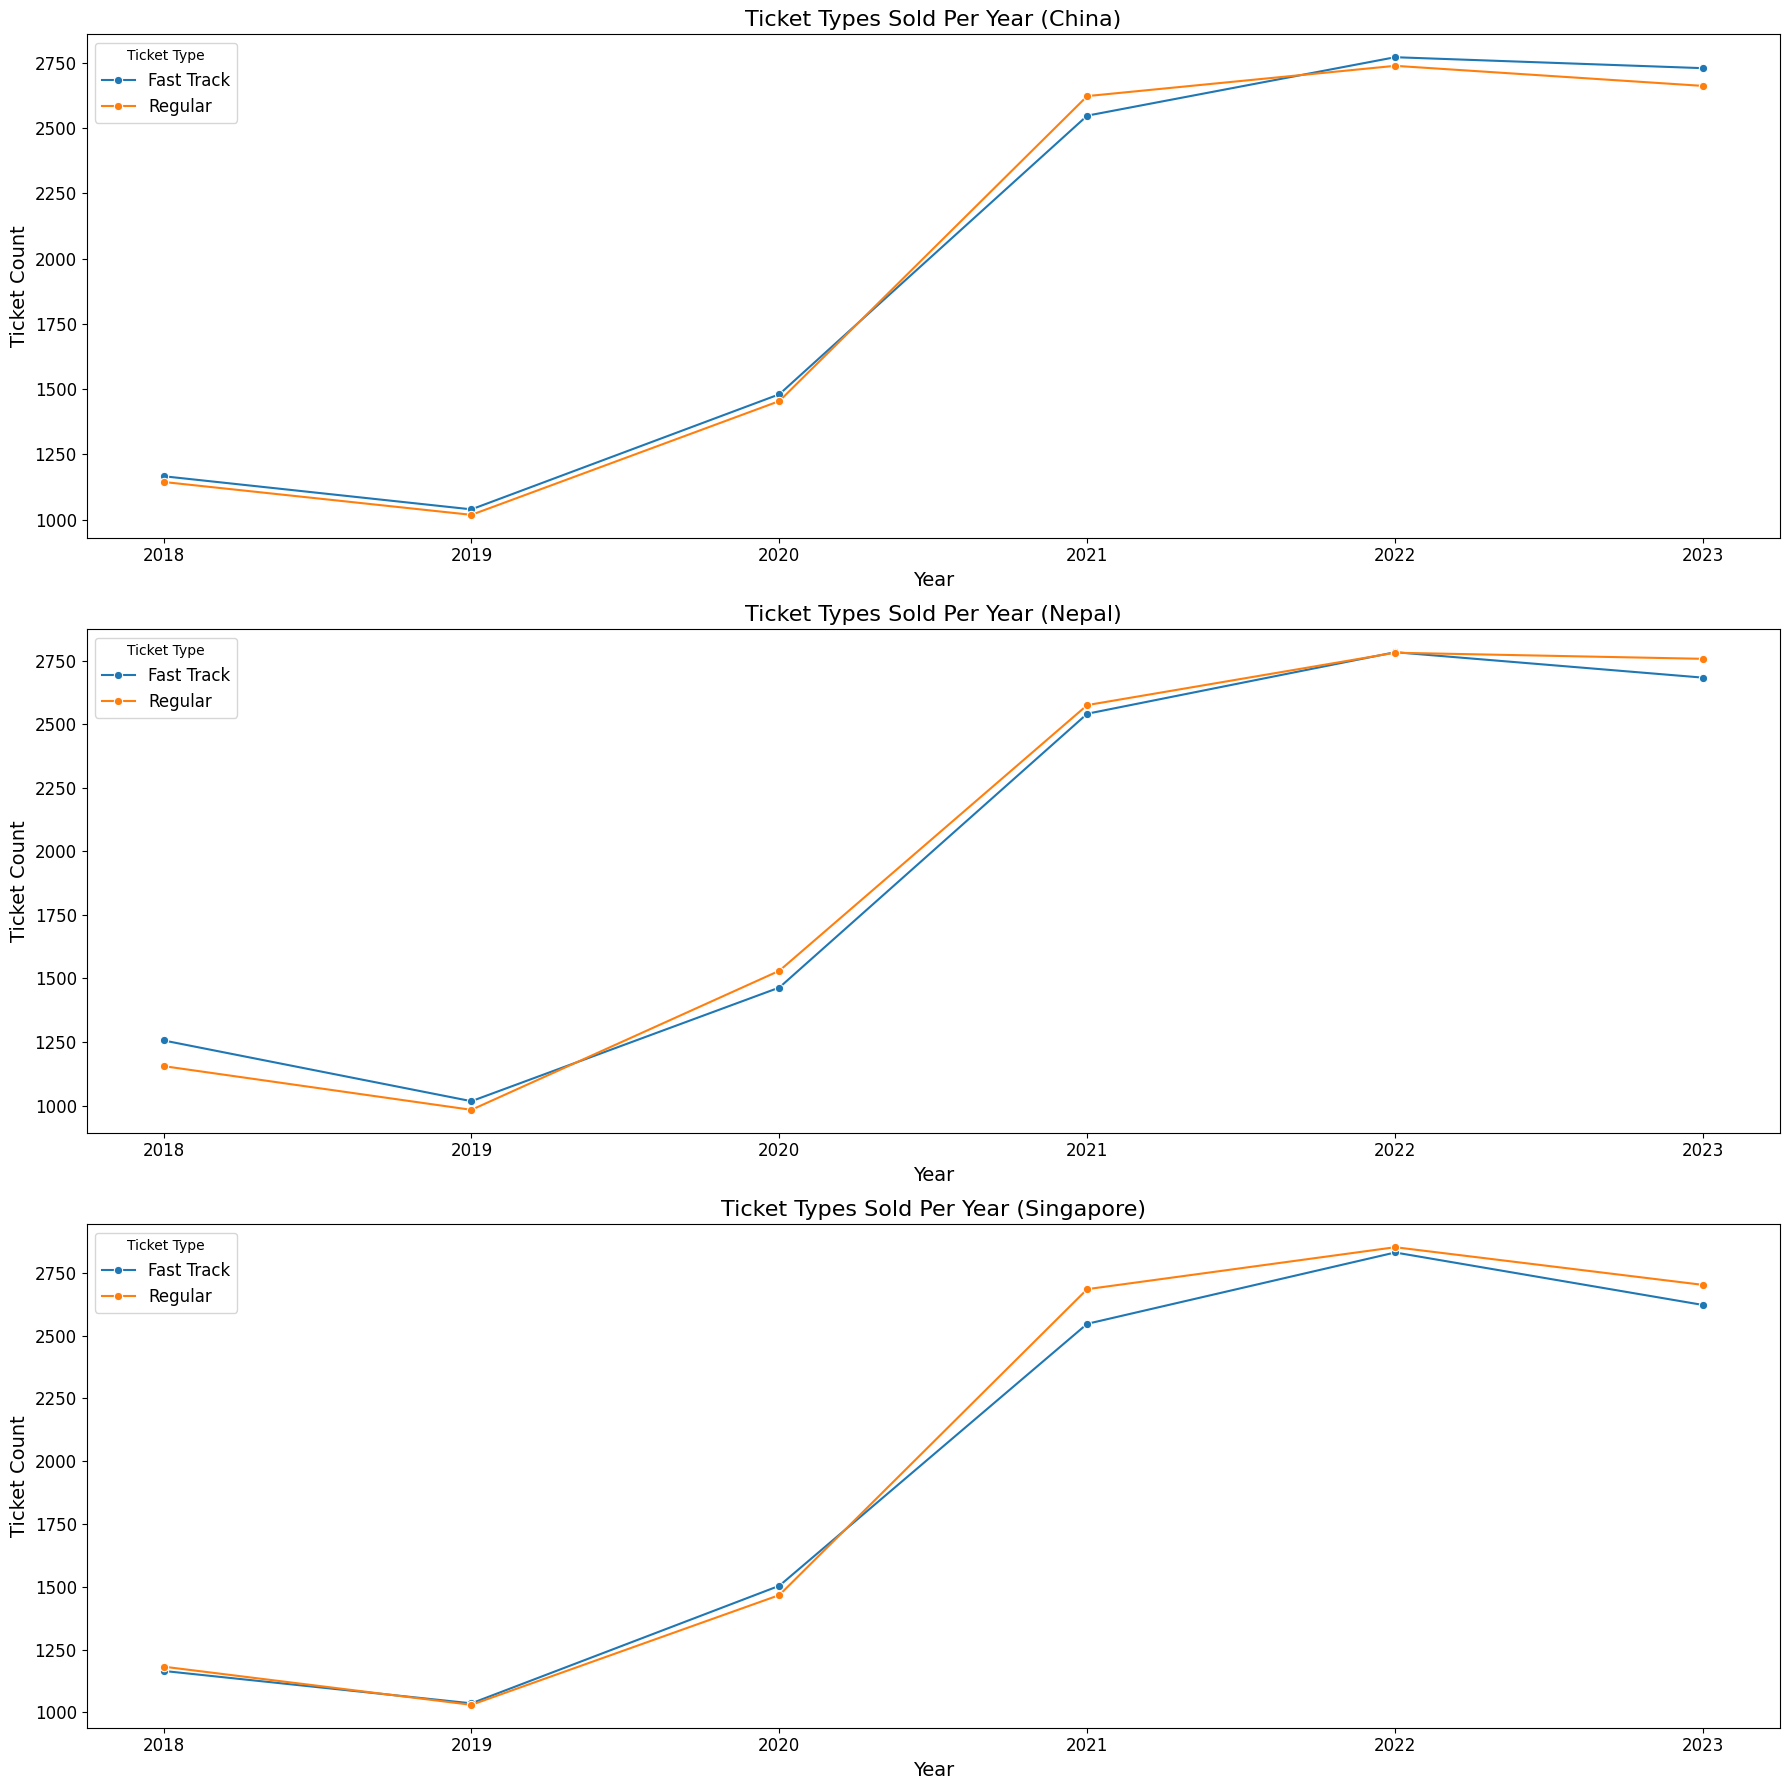

In [177]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate ticket type data by year and location
ticket_summary = data.groupby(['Year', 'Location', 'Ticket Type']).size().reset_index(name='Ticket_Count')

# Get unique locations for creating separate visualizations
locations = data['Location'].unique()

# Create separate line graph visualizations for each location
plt.figure(figsize=(18, 18))

for i, location in enumerate(locations, start=1):
    plt.subplot(len(locations), 1, i)
    location_data = ticket_summary[ticket_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Ticket_Count', 
        hue='Ticket Type', 
        marker='o'
    )
    plt.title(f'Ticket Types Sold Per Year ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Ticket Count', fontsize=14)
    plt.legend(title='Ticket Type', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


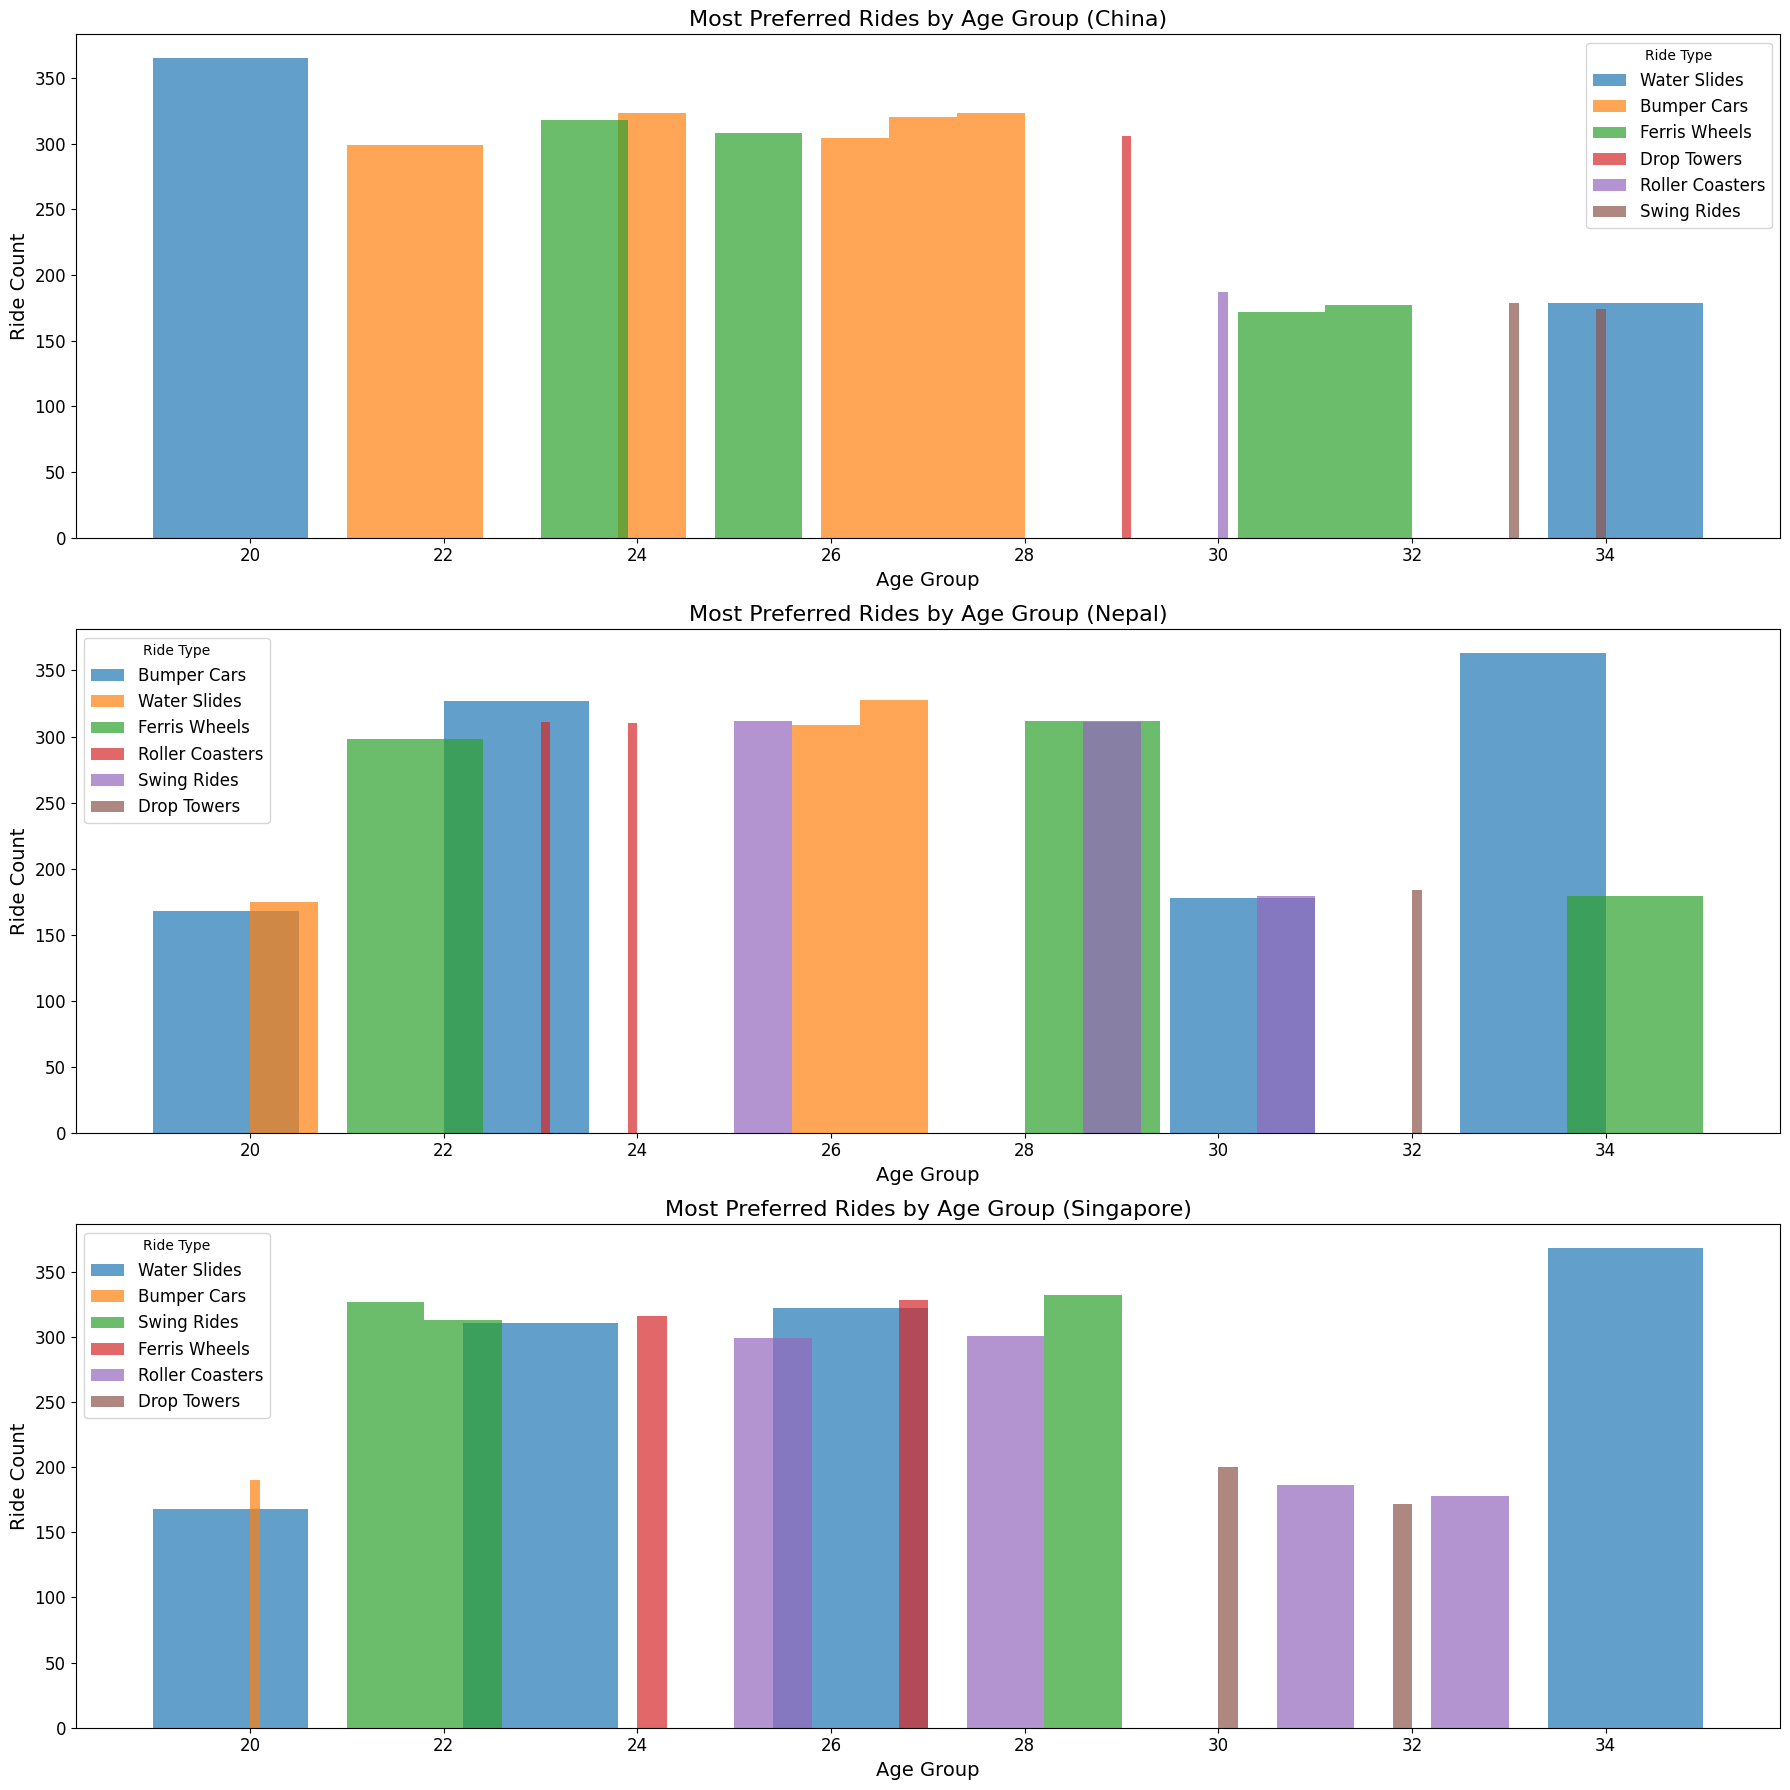

In [178]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for age and type of ride preferred by location
ride_preference_summary = data.groupby(['Location', 'Age', 'Type_of_Ride_Preferred']).size().reset_index(name='Ride_Count')

# Calculate the most preferred rides for each age group by location
preferred_rides = (
    ride_preference_summary
    .sort_values(['Location', 'Age', 'Ride_Count'], ascending=[True, True, False])
    .groupby(['Location', 'Age'])
    .head(1)
    .reset_index(drop=True)
)

# Get unique locations for creating separate histograms
locations = preferred_rides['Location'].unique()

# Create separate histograms for each location
plt.figure(figsize=(18, 18))

for i, location in enumerate(locations, start=1):
    plt.subplot(len(locations), 1, i)
    location_data = preferred_rides[preferred_rides['Location'] == location]
    for ride_type in location_data['Type_of_Ride_Preferred'].unique():
        ride_data = location_data[location_data['Type_of_Ride_Preferred'] == ride_type]
        plt.hist(
            ride_data['Age'], 
            weights=ride_data['Ride_Count'], 
            bins=10, 
            alpha=0.7, 
            label=ride_type
        )
    plt.title(f'Most Preferred Rides by Age Group ({location})', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Ride Count', fontsize=14)
    plt.legend(title='Ride Type', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [179]:
import pandas as pd
from tabulate import tabulate

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for type of ride preferred by location (all years)
ride_preference_summary = data.groupby(['Location', 'Type_of_Ride_Preferred']).size().reset_index(name='Ride_Count')

# Filter data for 2023
data_2023 = data[data['Year'] == 2023]
ride_preference_summary_2023 = data_2023.groupby(['Location', 'Type_of_Ride_Preferred']).size().reset_index(name='Ride_Count_2023')

# Calculate the most and least preferred rides for all years
most_preferred = (
    ride_preference_summary
    .sort_values(['Location', 'Ride_Count'], ascending=[True, False])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

least_preferred = (
    ride_preference_summary
    .sort_values(['Location', 'Ride_Count'], ascending=[True, True])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

# Combine results into a single table for all years
preference_summary_all_years = pd.merge(
    most_preferred, 
    least_preferred, 
    on='Location', 
    suffixes=('_Most_Preferred', '_Least_Preferred')
)

preference_summary_all_years.rename(columns={
    'Type_of_Ride_Preferred_Most_Preferred': 'Most Preferred Ride (All)',
    'Ride_Count_Most_Preferred': 'Most Preferred Count (All)',
    'Type_of_Ride_Preferred_Least_Preferred': 'Least Preferred Ride (All)',
    'Ride_Count_Least_Preferred': 'Least Preferred Count (All)'
}, inplace=True)

# Calculate the most and least preferred rides for 2023
most_preferred_2023 = (
    ride_preference_summary_2023
    .sort_values(['Location', 'Ride_Count_2023'], ascending=[True, False])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

least_preferred_2023 = (
    ride_preference_summary_2023
    .sort_values(['Location', 'Ride_Count_2023'], ascending=[True, True])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

# Combine results into a single table for 2023
preference_summary_2023 = pd.merge(
    most_preferred_2023, 
    least_preferred_2023, 
    on='Location', 
    suffixes=('_Most_Preferred_2023', '_Least_Preferred_2023')
)

preference_summary_2023.rename(columns={
    'Type_of_Ride_Preferred_Most_Preferred_2023': 'Most Preferred Ride (2023)',
    'Ride_Count_2023_Most_Preferred_2023': 'Most Preferred Count (2023)',
    'Type_of_Ride_Preferred_Least_Preferred_2023': 'Least Preferred Ride (2023)',
    'Ride_Count_2023_Least_Preferred_2023': 'Least Preferred Count (2023)'
}, inplace=True)

# Display the tables separately
print("\nRide Preference Summary by Location (All Years):\n")
print(tabulate(preference_summary_all_years, headers='keys', tablefmt='grid', showindex=False))

print("\nRide Preference Summary by Location (2023):\n")
print(tabulate(preference_summary_2023, headers='keys', tablefmt='grid', showindex=False))

# Save the tables to CSV files


Ride Preference Summary by Location (All Years):

+------------+-----------------------------+------------------------------+------------------------------+-------------------------------+
| Location   | Most Preferred Ride (All)   |   Most Preferred Count (All) | Least Preferred Ride (All)   |   Least Preferred Count (All) |
+============+=============================+==============================+==============================+===============================+
| China      | Bumper Cars                 |                         3993 | Drop Towers                  |                          3841 |
+------------+-----------------------------+------------------------------+------------------------------+-------------------------------+
| Nepal      | Drop Towers                 |                         3941 | Bumper Cars                  |                          3889 |
+------------+-----------------------------+------------------------------+------------------------------+---------

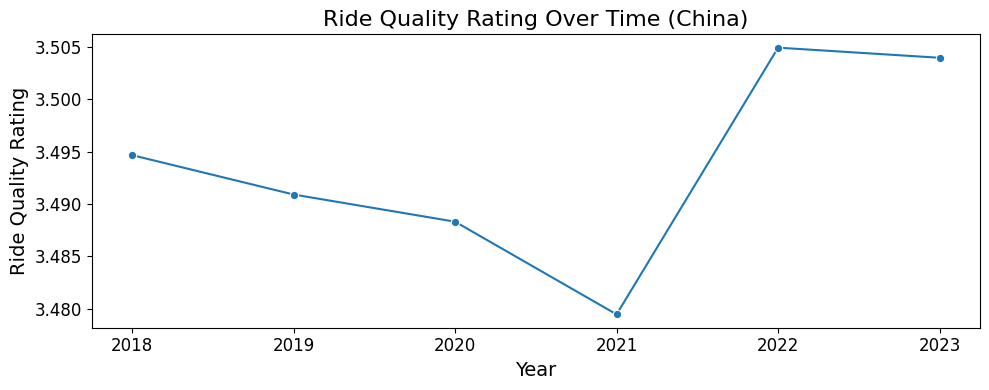

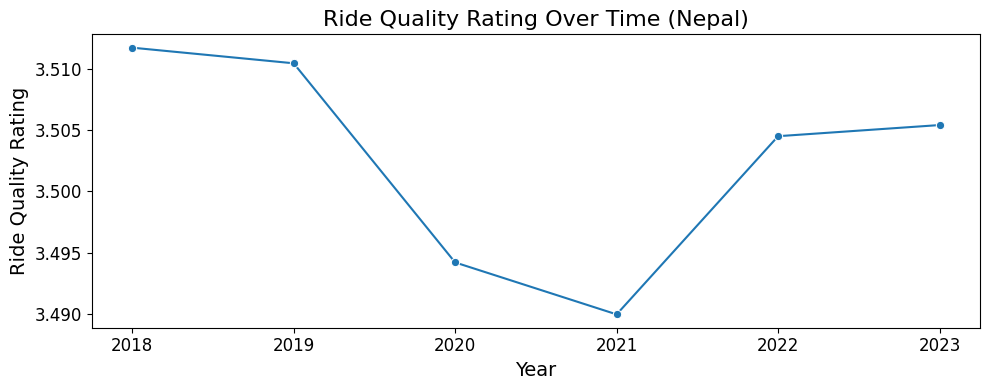

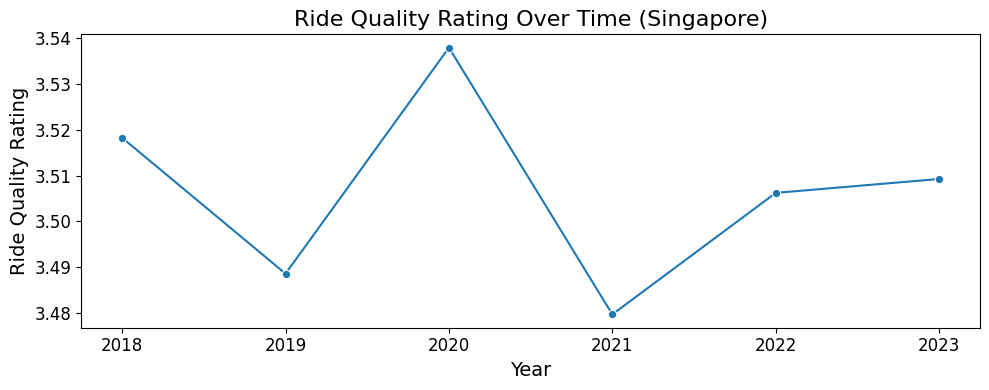

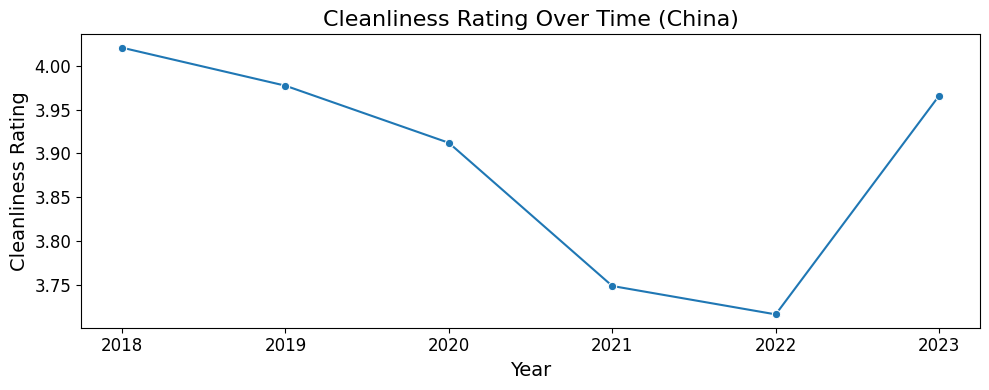

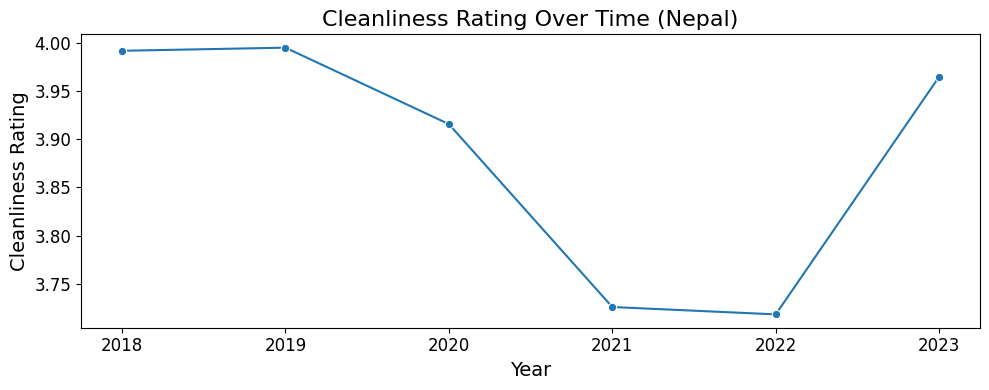

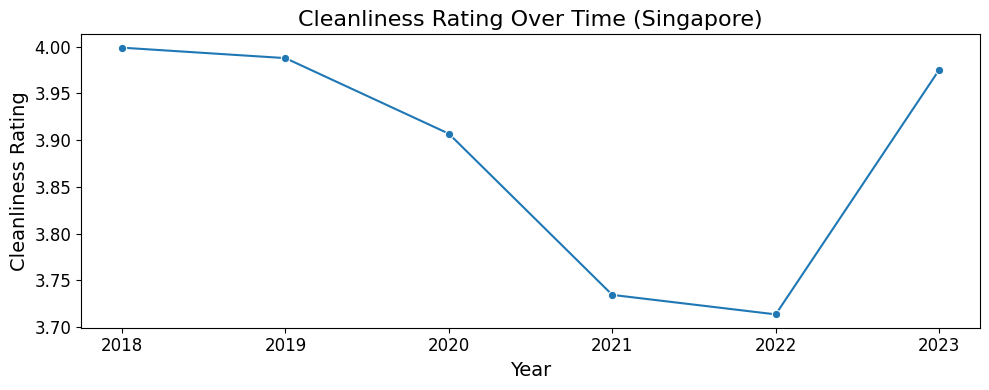

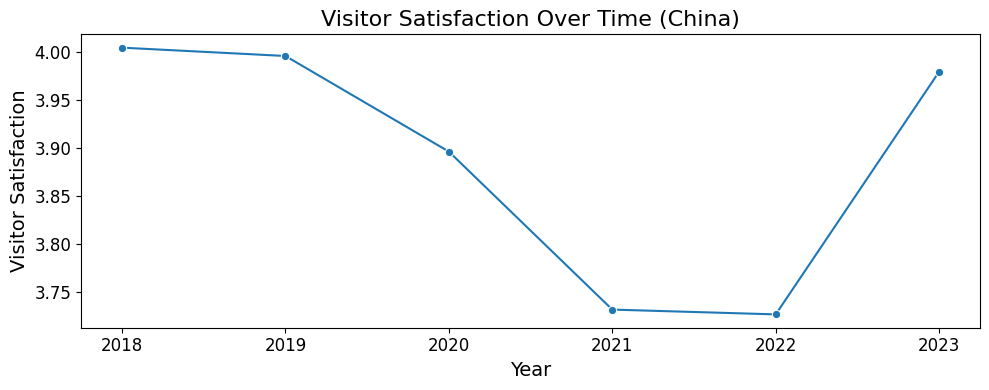

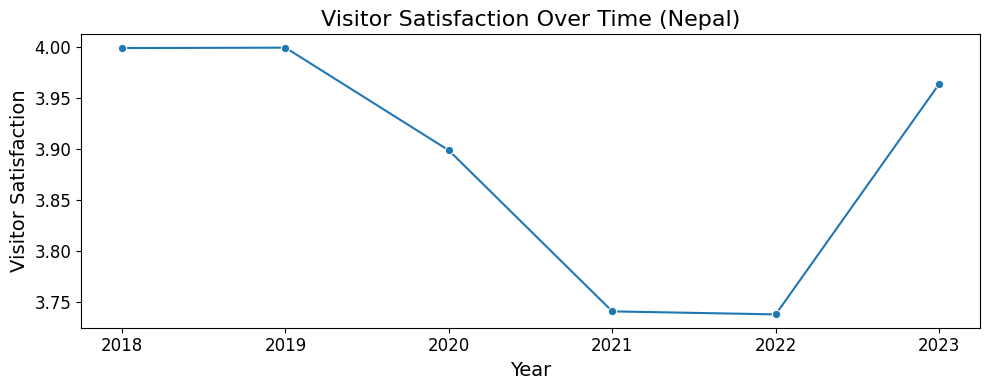

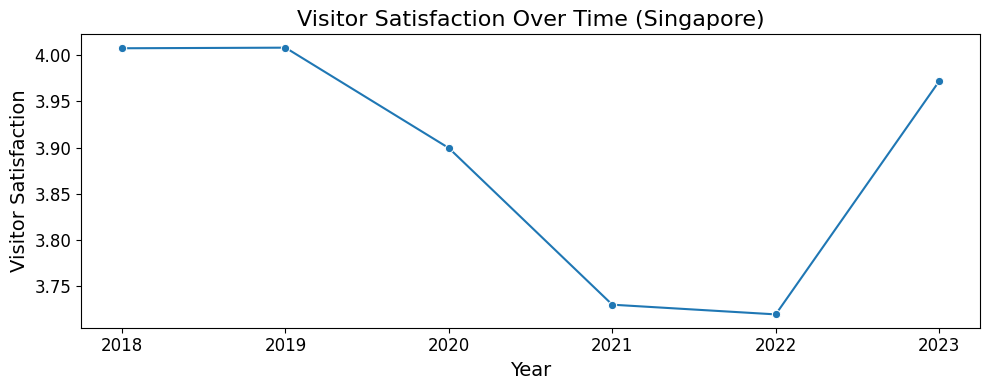

In [180]:

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for ride quality, cleanliness, and visitor satisfaction by year and location
quality_summary = data.groupby(['Location', 'Year'])['Ride_Quality_Rating'].mean().reset_index()
cleanliness_summary = data.groupby(['Location', 'Year'])['Cleanliness_Rating'].mean().reset_index()
satisfaction_summary = data.groupby(['Location', 'Year'])['Visitor_Satisfaction'].mean().reset_index()

# Get unique locations for creating separate visualizations
locations = data['Location'].unique()

# Ride Quality Rating by Time
for location in locations:
    plt.figure(figsize=(10, 4))
    location_data = quality_summary[quality_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Ride_Quality_Rating', 
        marker='o'
    )
    plt.title(f'Ride Quality Rating Over Time ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Ride Quality Rating', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Cleanliness Rating by Time
for location in locations:
    plt.figure(figsize=(10, 4))
    location_data = cleanliness_summary[cleanliness_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Cleanliness_Rating', 
        marker='o'
    )
    plt.title(f'Cleanliness Rating Over Time ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Cleanliness Rating', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Visitor Satisfaction by Time
for location in locations:
    plt.figure(figsize=(10, 4))
    location_data = satisfaction_summary[satisfaction_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Visitor_Satisfaction', 
        marker='o'
    )
    plt.title(f'Visitor Satisfaction Over Time ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Visitor Satisfaction', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [181]:
#highest rating and lowest rating for each location for all category
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for ride quality, cleanliness, and visitor satisfaction by year and location
quality_summary = data.groupby(['Location', 'Year'])['Ride_Quality_Rating'].mean().reset_index()
cleanliness_summary = data.groupby(['Location', 'Year'])['Cleanliness_Rating'].mean().reset_index()
satisfaction_summary = data.groupby(['Location', 'Year'])['Visitor_Satisfaction'].mean().reset_index()

# Combine the summaries into a single dataframe
overall_summary = pd.merge(quality_summary, cleanliness_summary, on=['Location', 'Year'])
overall_summary = pd.merge(overall_summary, satisfaction_summary, on=['Location', 'Year'])
overall_summary.rename(columns={
    'Ride_Quality_Rating': 'Average Ride Quality Rating',
    'Cleanliness_Rating': 'Average Cleanliness Rating',
    'Visitor_Satisfaction': 'Average Visitor Satisfaction'
}, inplace=True)

# Calculate highest and lowest for each metric by location and year
highest_summary = overall_summary.groupby(['Location']).max().reset_index()
highest_summary.rename(columns={
    'Year': 'Year of Highest Ratings',
    'Average Ride Quality Rating': 'Highest Ride Quality Rating',
    'Average Cleanliness Rating': 'Highest Cleanliness Rating',
    'Average Visitor Satisfaction': 'Highest Visitor Satisfaction'
}, inplace=True)

lowest_summary = overall_summary.groupby(['Location']).min().reset_index()
lowest_summary.rename(columns={
    'Year': 'Year of Lowest Ratings',
    'Average Ride Quality Rating': 'Lowest Ride Quality Rating',
    'Average Cleanliness Rating': 'Lowest Cleanliness Rating',
    'Average Visitor Satisfaction': 'Lowest Visitor Satisfaction'
}, inplace=True)

# Merge highest and lowest summaries for a complete table
final_summary = pd.merge(highest_summary, lowest_summary, on='Location', suffixes=('_Highest', '_Lowest'))

# Display the structured table (highest ratings)
highest_fields_summary = final_summary[[
    'Location', 
    'Year of Highest Ratings', 
    'Highest Ride Quality Rating', 
    'Highest Cleanliness Rating', 
    'Highest Visitor Satisfaction'
]]
print("\nStructured Summary of Highest Ratings:\n")
print(tabulate(highest_fields_summary, headers='keys', tablefmt='grid', showindex=False))

# Display the structured table (lowest ratings)
lowest_fields_summary = final_summary[[
    'Location', 
    'Year of Lowest Ratings', 
    'Lowest Ride Quality Rating', 
    'Lowest Cleanliness Rating', 
    'Lowest Visitor Satisfaction'
]]
print("\nStructured Summary of Lowest Ratings:\n")
print(tabulate(lowest_fields_summary, headers='keys', tablefmt='grid', showindex=False))



Structured Summary of Highest Ratings:

+------------+---------------------------+-------------------------------+------------------------------+--------------------------------+
| Location   |   Year of Highest Ratings |   Highest Ride Quality Rating |   Highest Cleanliness Rating |   Highest Visitor Satisfaction |
+============+===========================+===============================+==============================+================================+
| China      |                      2023 |                       3.50495 |                      4.02043 |                        4.00468 |
+------------+---------------------------+-------------------------------+------------------------------+--------------------------------+
| Nepal      |                      2023 |                       3.51178 |                      3.9951  |                        3.99975 |
+------------+---------------------------+-------------------------------+------------------------------+--------------------

/tmp/ipykernel_805913/230834888.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_805913/230834888.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()


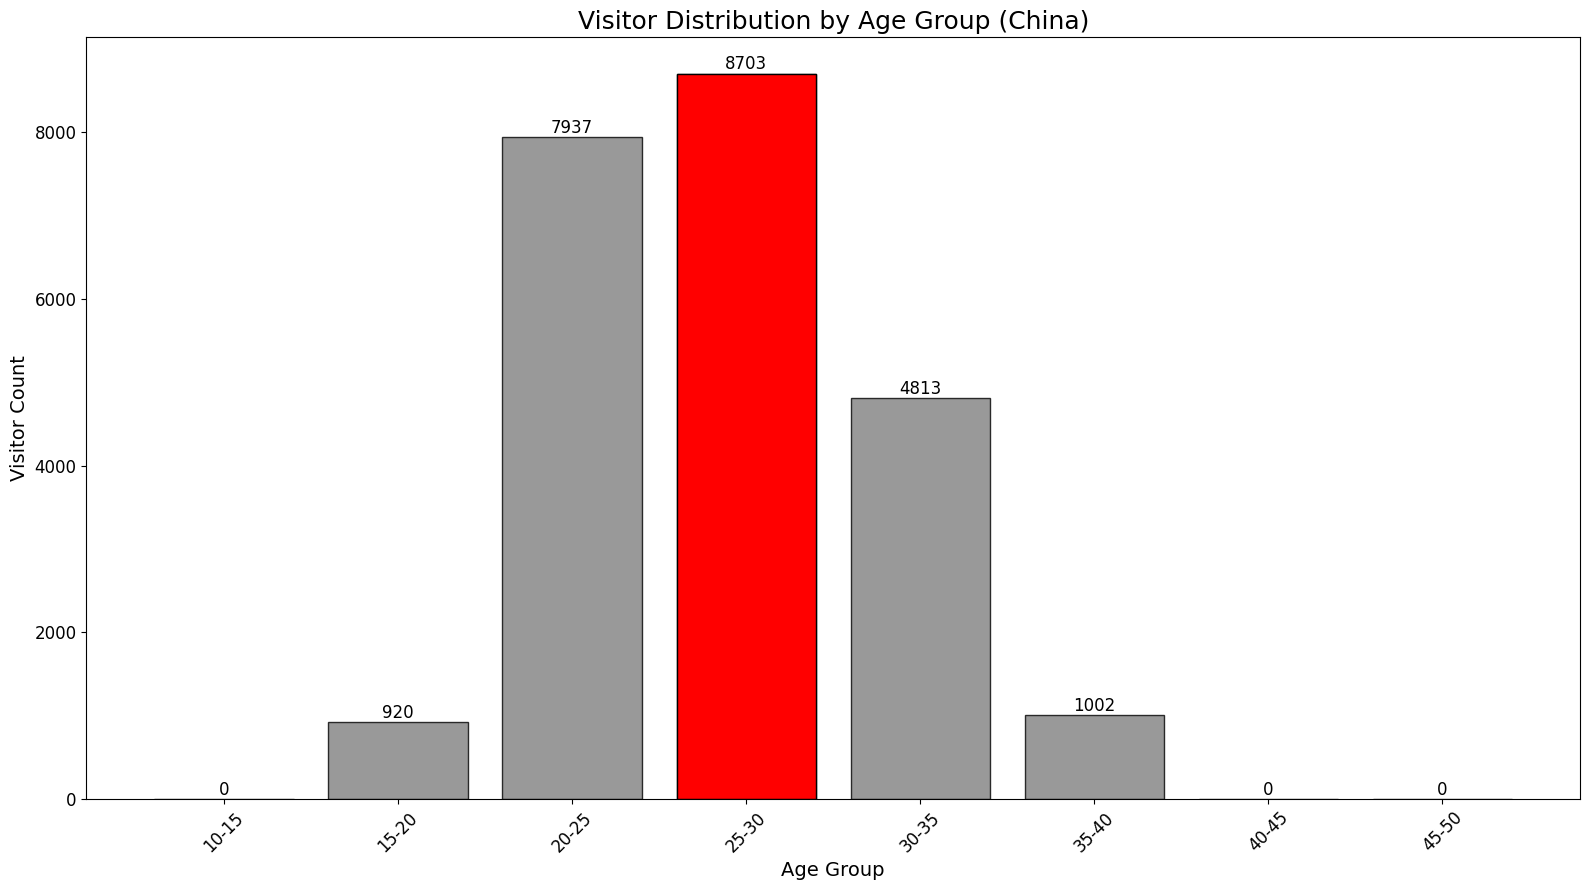

/tmp/ipykernel_805913/230834888.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_805913/230834888.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()


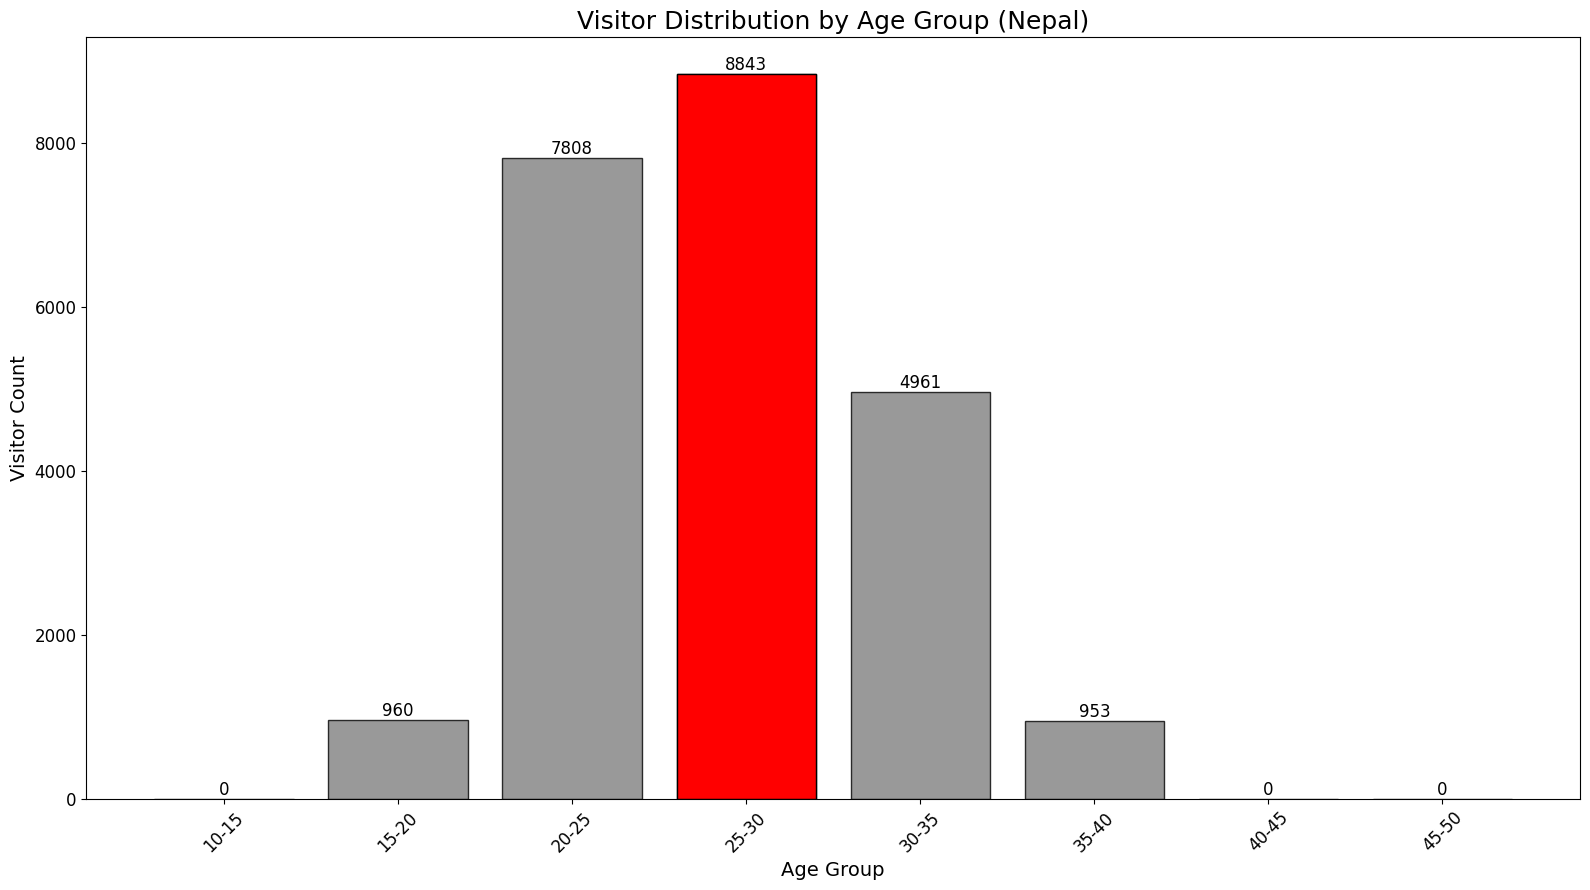

/tmp/ipykernel_805913/230834888.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_805913/230834888.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()


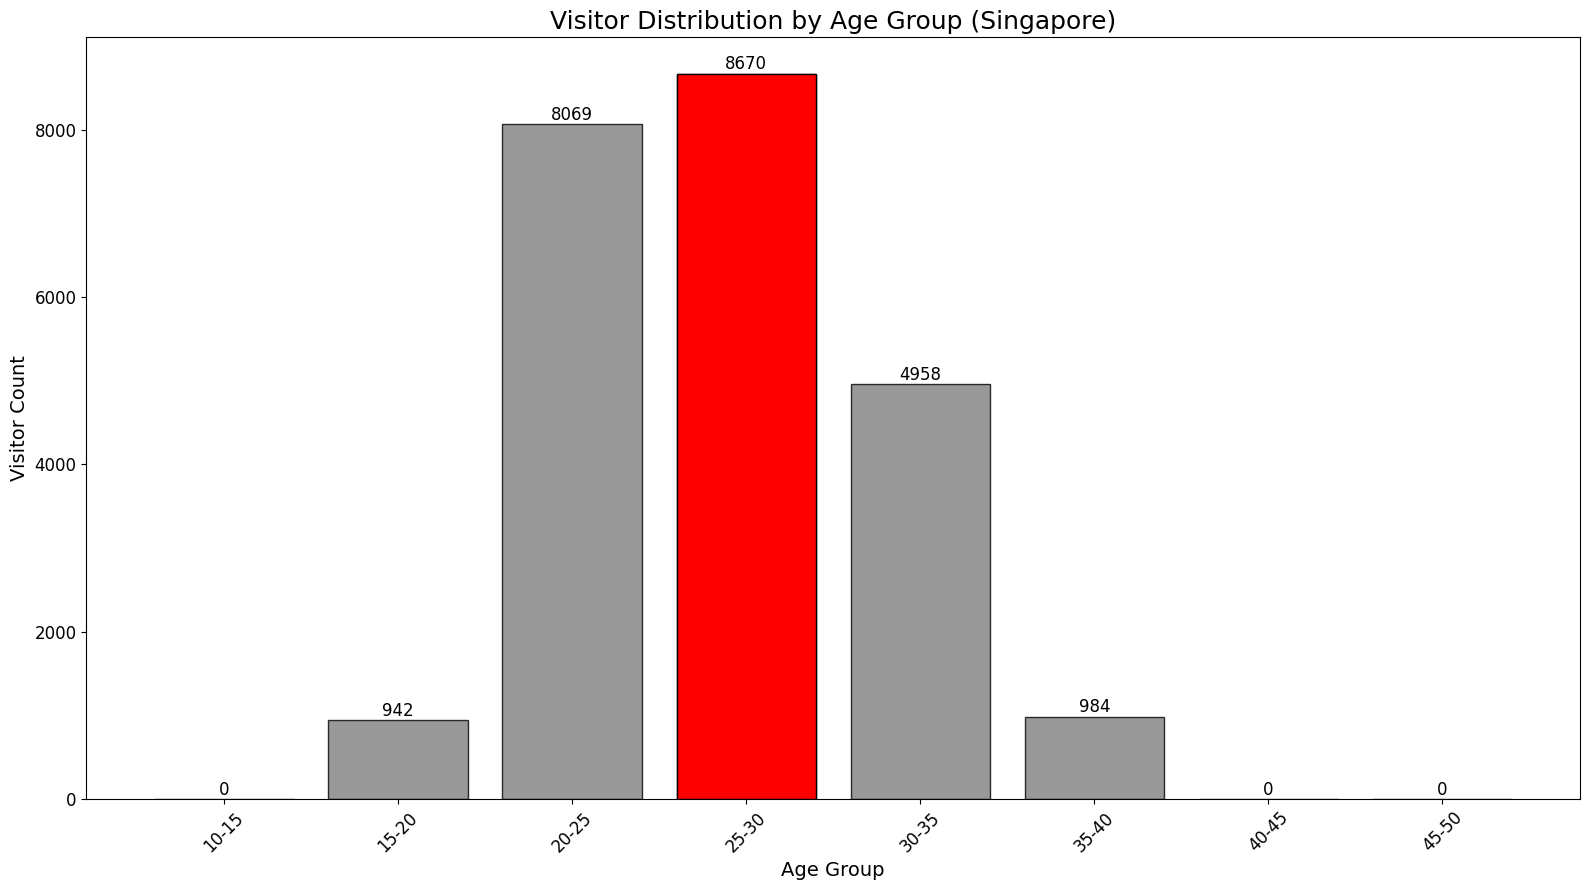

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Visualization to see which age group visits each location the most
age_location_summary = data.groupby(['Location', 'Age']).size().reset_index(name='Visitor_Count')
locations = age_location_summary['Location'].unique()


# Visualization to see which age group visits each location the most
age_location_summary = data.groupby(['Location', 'Age']).size().reset_index(name='Visitor_Count')
locations = age_location_summary['Location'].unique()

for location in locations:
    plt.figure(figsize=(16, 9))
    location_data = age_location_summary[age_location_summary['Location'] == location]
    
    # Group age into bins and calculate visitor counts for each range
    bins = [10, 15, 20, 25, 30, 35, 40, 45, 50]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
    location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
    grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()

    # Plot histogram with annotations
    plt.bar(grouped_data['Age_Group'], grouped_data['Visitor_Count'], color='grey', edgecolor='black', alpha=0.8)
    plt.title(f'Visitor Distribution by Age Group ({location})', fontsize=18)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Visitor Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate bars with exact counts
    for i, value in enumerate(grouped_data['Visitor_Count']):
        plt.text(i, value + 50, str(value), ha='center', fontsize=12)

    # Highlight the bin with the highest visitor count
    max_index = grouped_data['Visitor_Count'].idxmax()
    plt.bar(grouped_data['Age_Group'][max_index], grouped_data['Visitor_Count'][max_index], color='red', edgecolor='black')

    plt.tight_layout()
    plt.show()





/tmp/ipykernel_805913/1088200575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')


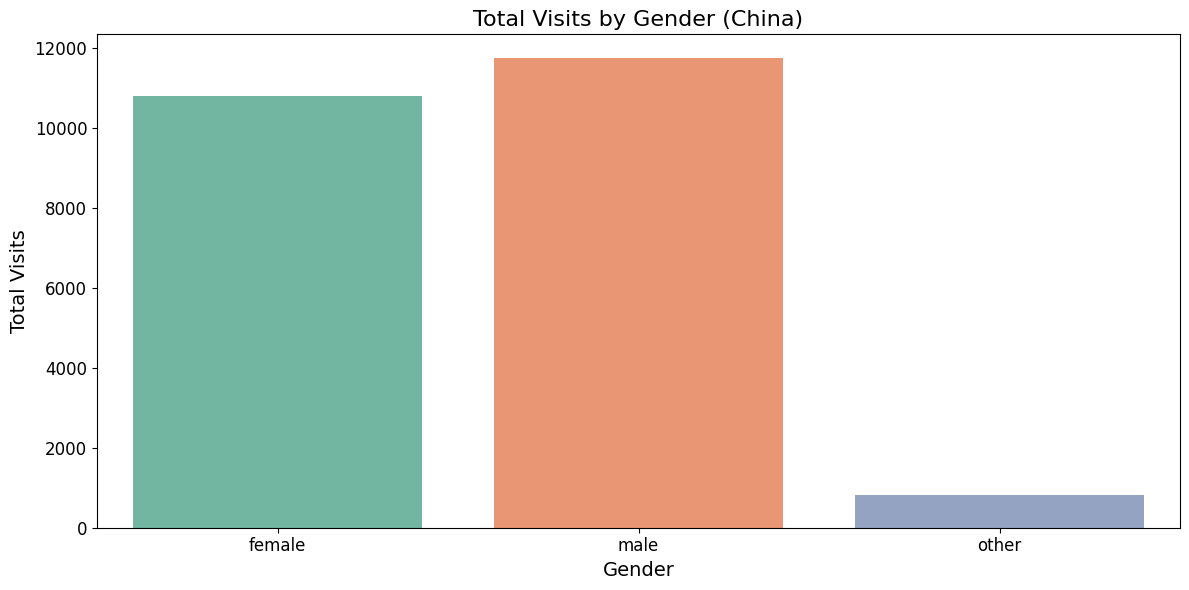

/tmp/ipykernel_805913/1088200575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')


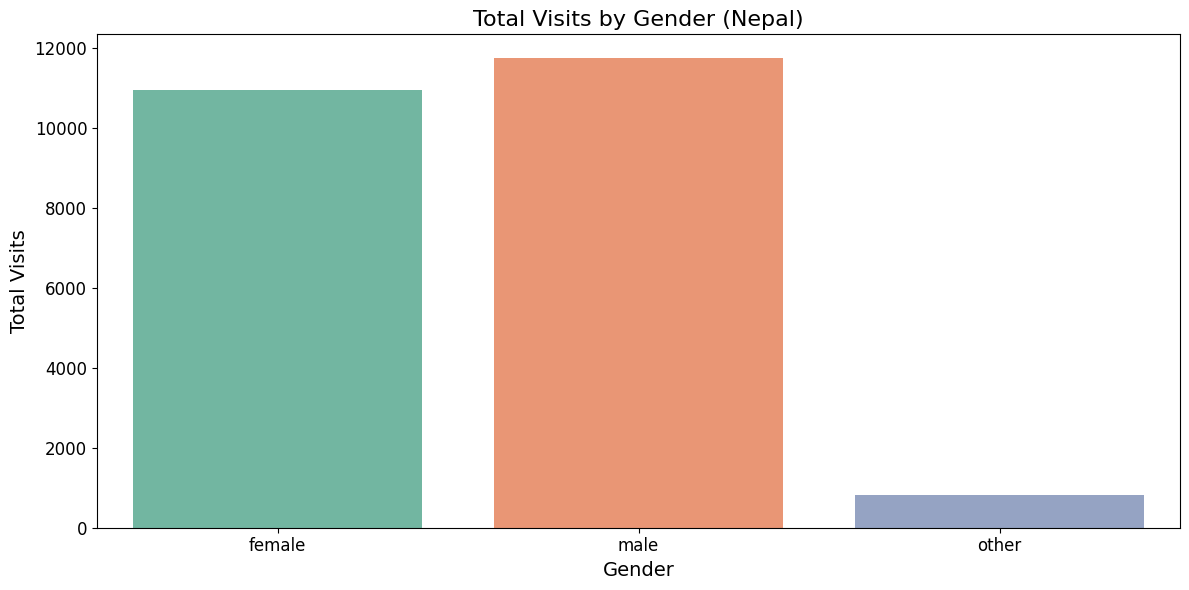

/tmp/ipykernel_805913/1088200575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')


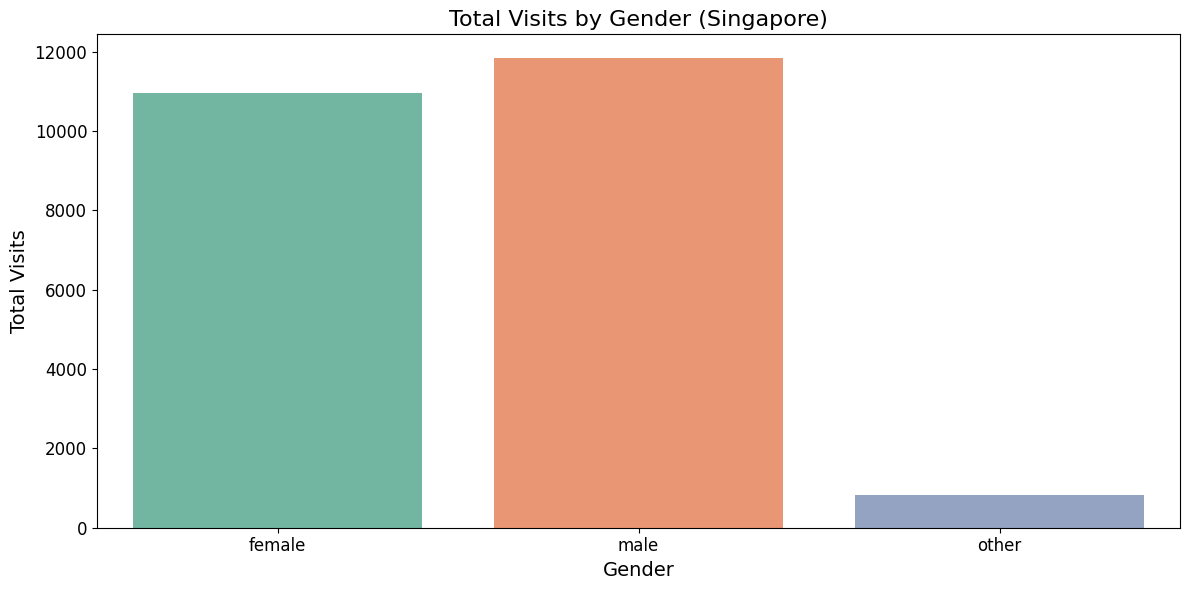

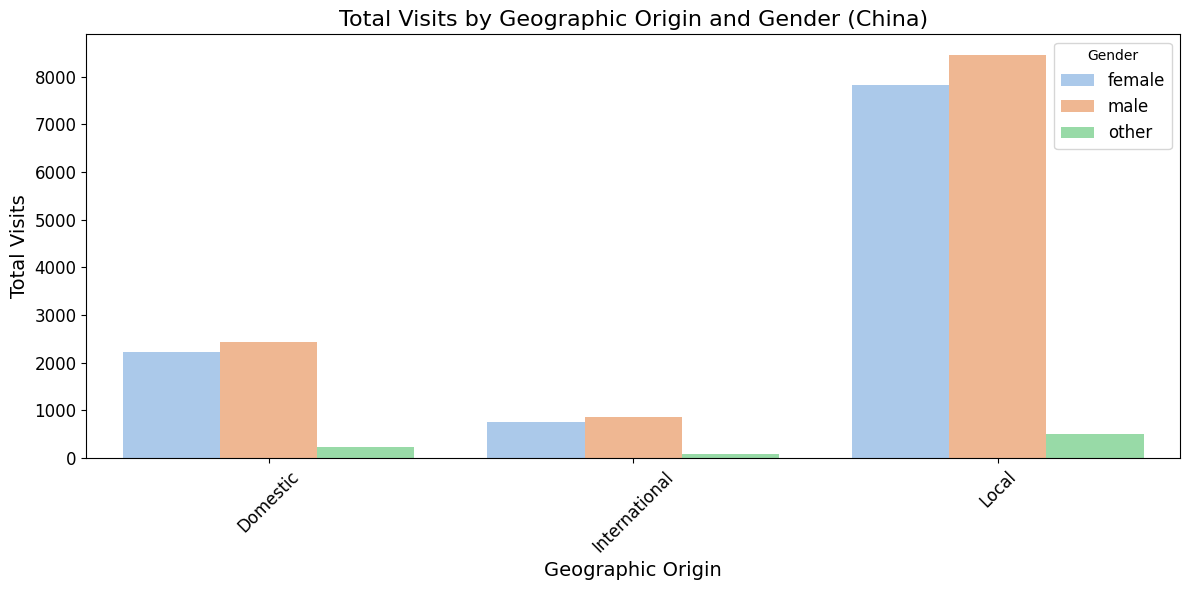

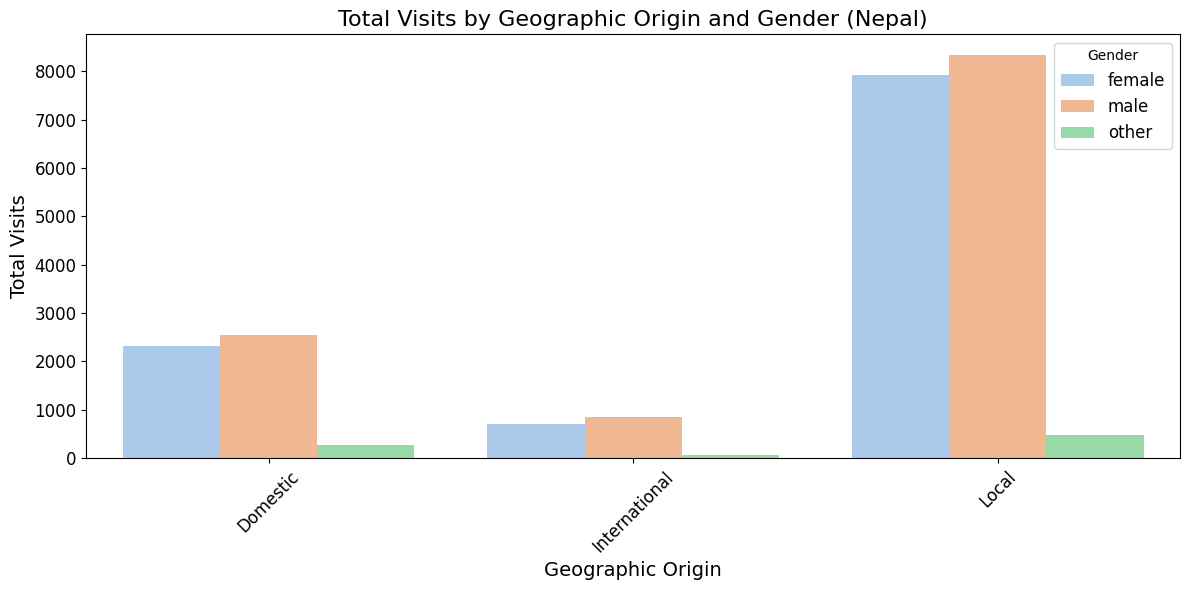

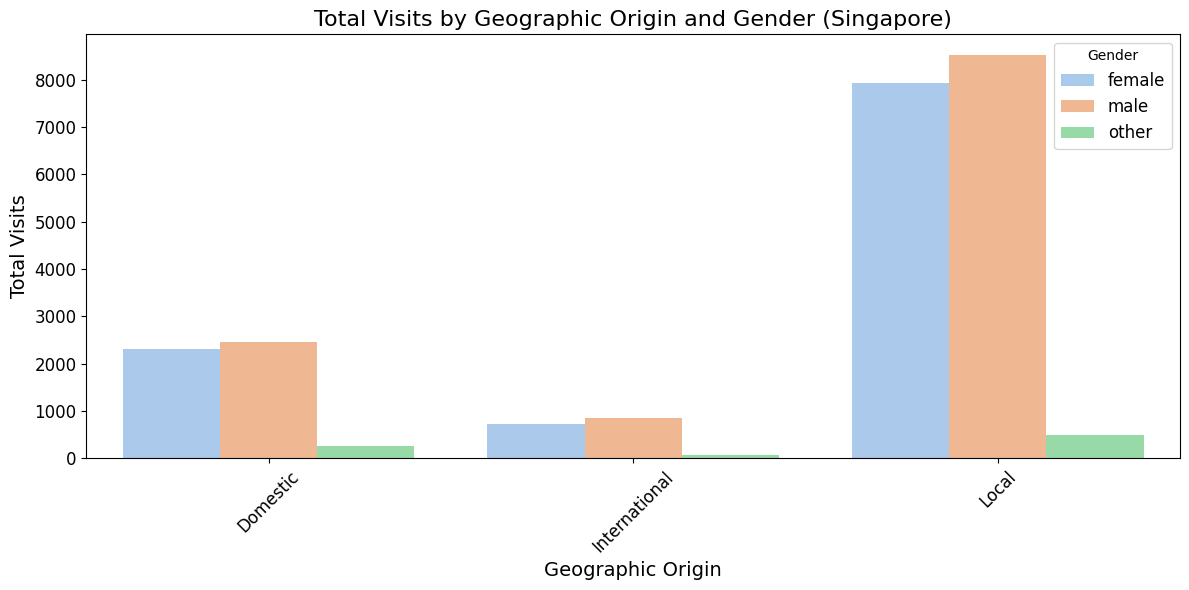

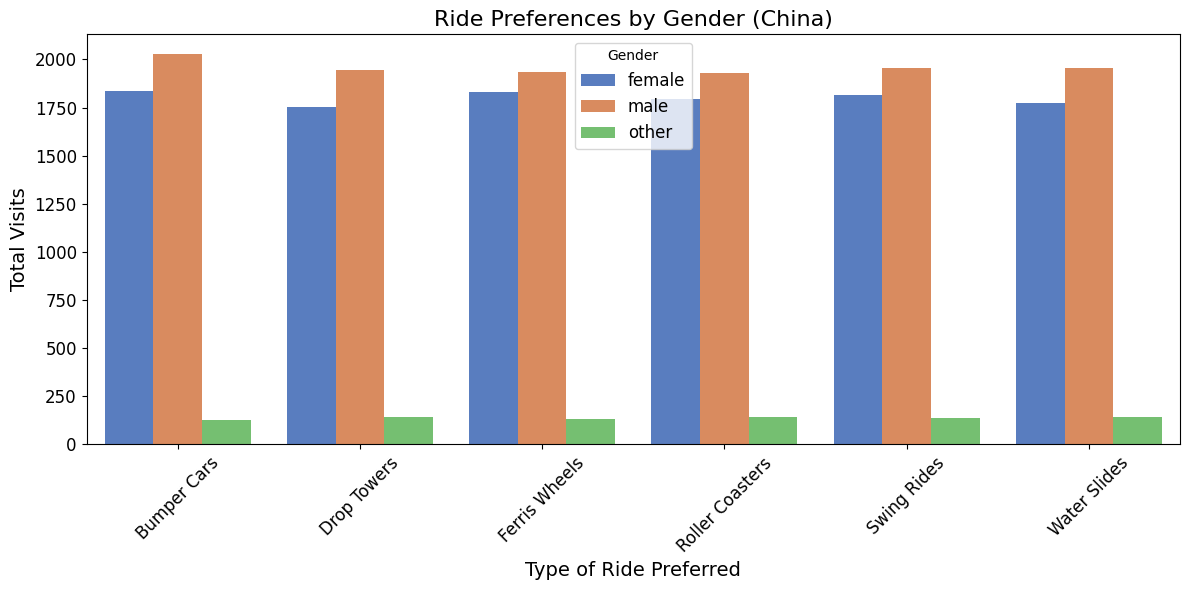

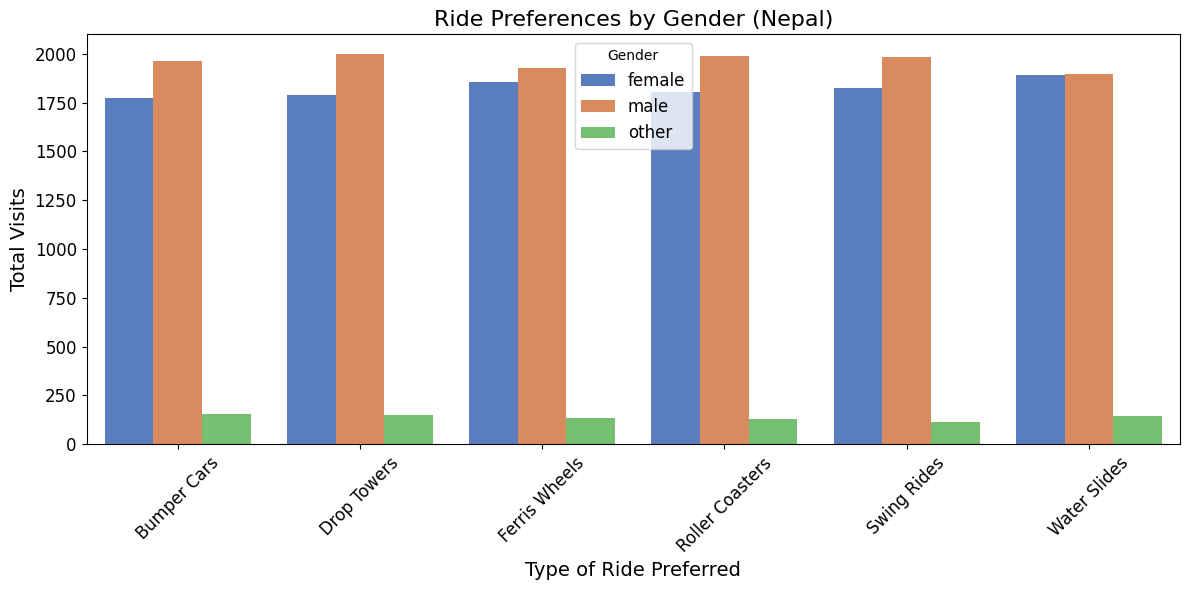

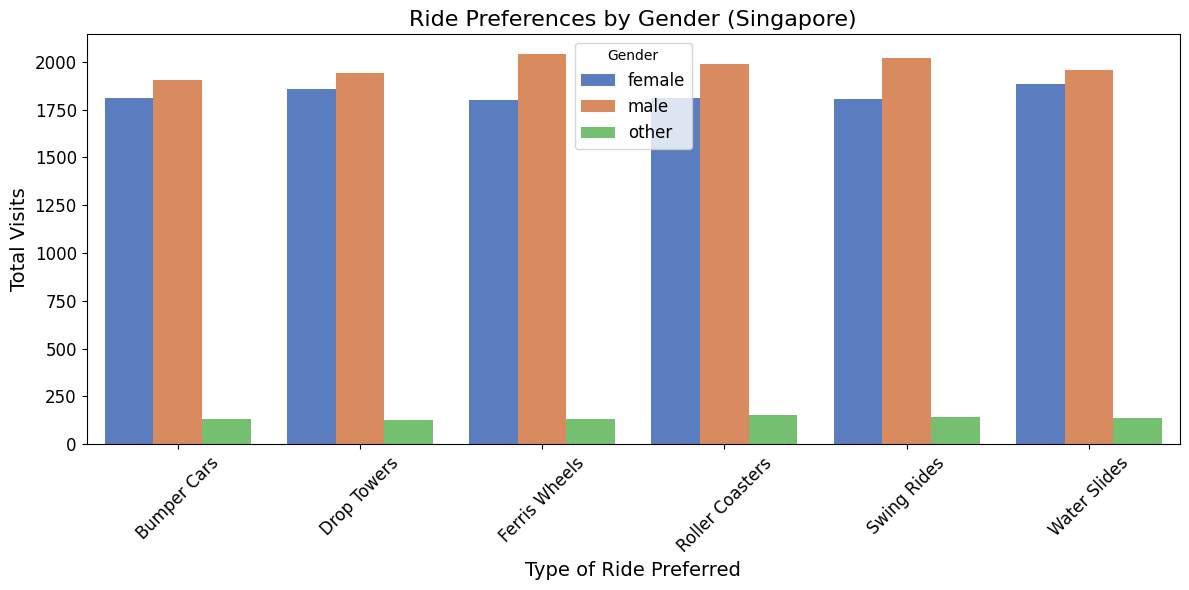

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year
data['Gender'] = data['Gender'].str.lower()
# Visualization 1: Total visits by gender for each location
locations = data['Location'].unique()
for location in locations:
    plt.figure(figsize=(12, 6))
    location_data = data[data['Location'] == location]
    gender_summary = location_data.groupby('Gender').size().reset_index(name='Total_Visits')
    sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')
    plt.title(f'Total Visits by Gender ({location})', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Total Visits', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization 2: Total visits by geographic origin, location, and gender
for location in locations:
    plt.figure(figsize=(12, 6))
    location_data = data[data['Location'] == location]
    geo_gender_summary = location_data.groupby(['Geographic_Origin', 'Gender']).size().reset_index(name='Total_Visits')
    sns.barplot(data=geo_gender_summary, x='Geographic_Origin', y='Total_Visits', hue='Gender', palette='pastel')
    plt.title(f'Total Visits by Geographic Origin and Gender ({location})', fontsize=16)
    plt.xlabel('Geographic Origin', fontsize=14)
    plt.ylabel('Total Visits', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization 3: Ride preferences by gender for each location
for location in locations:
    plt.figure(figsize=(12, 6))
    location_data = data[data['Location'] == location]
    ride_gender_summary = location_data.groupby(['Type_of_Ride_Preferred', 'Gender']).size().reset_index(name='Total_Visits')
    sns.barplot(data=ride_gender_summary, x='Type_of_Ride_Preferred', y='Total_Visits', hue='Gender', palette='muted')
    plt.title(f'Ride Preferences by Gender ({location})', fontsize=16)
    plt.xlabel('Type of Ride Preferred', fontsize=14)
    plt.ylabel('Total Visits', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.tight_layout()
    plt.show()


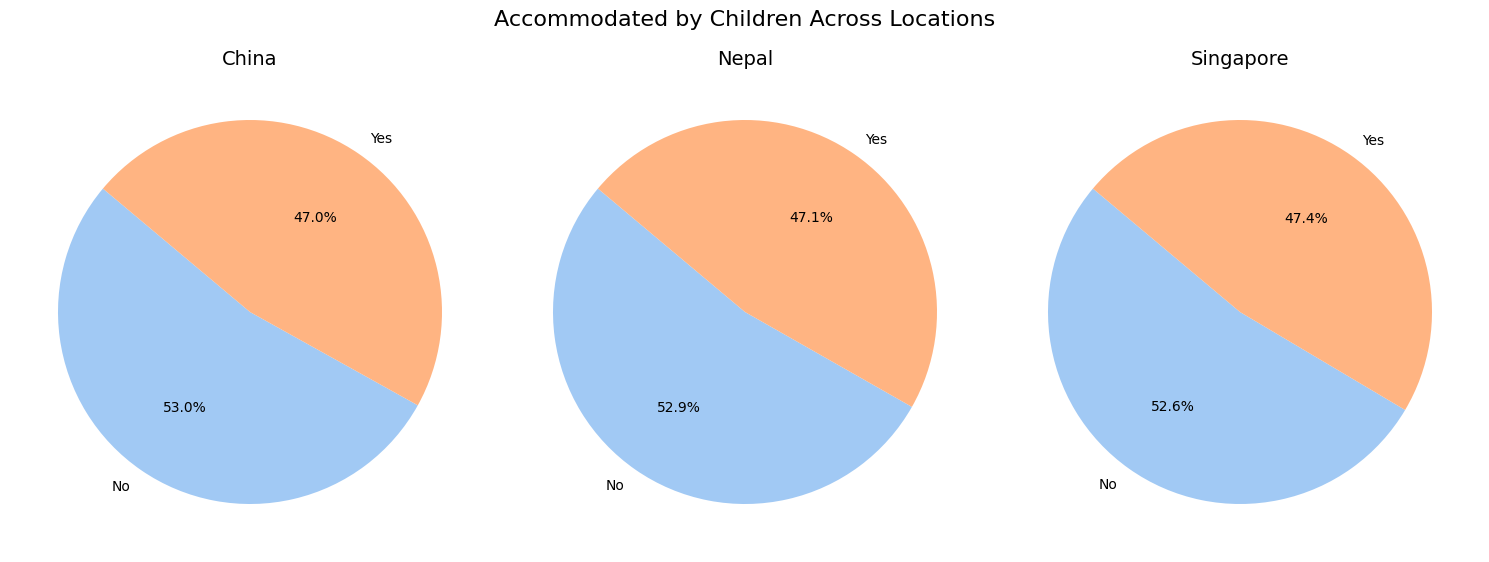

In [184]:


# Visualization: Accommodated by children for each location using pie charts in the same figure
num_locations = len(data['Location'].unique())
plt.figure(figsize=(5 * num_locations, 6))

locations = data['Location'].unique()
for i, location in enumerate(locations, start=1):
    plt.subplot(1, num_locations, i)
    location_data = data[data['Location'] == location]
    child_accommodation_summary = location_data['Accompanied_by_Children'].value_counts().reset_index()
    child_accommodation_summary.columns = ['Accompanied_by_Children', 'Count']
    plt.pie(
        child_accommodation_summary['Count'], 
        labels=child_accommodation_summary['Accompanied_by_Children'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'),
        textprops={'fontsize': 10}
    )
    plt.title(f'{location}', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Accommodated by Children Across Locations', fontsize=16)
plt.show()


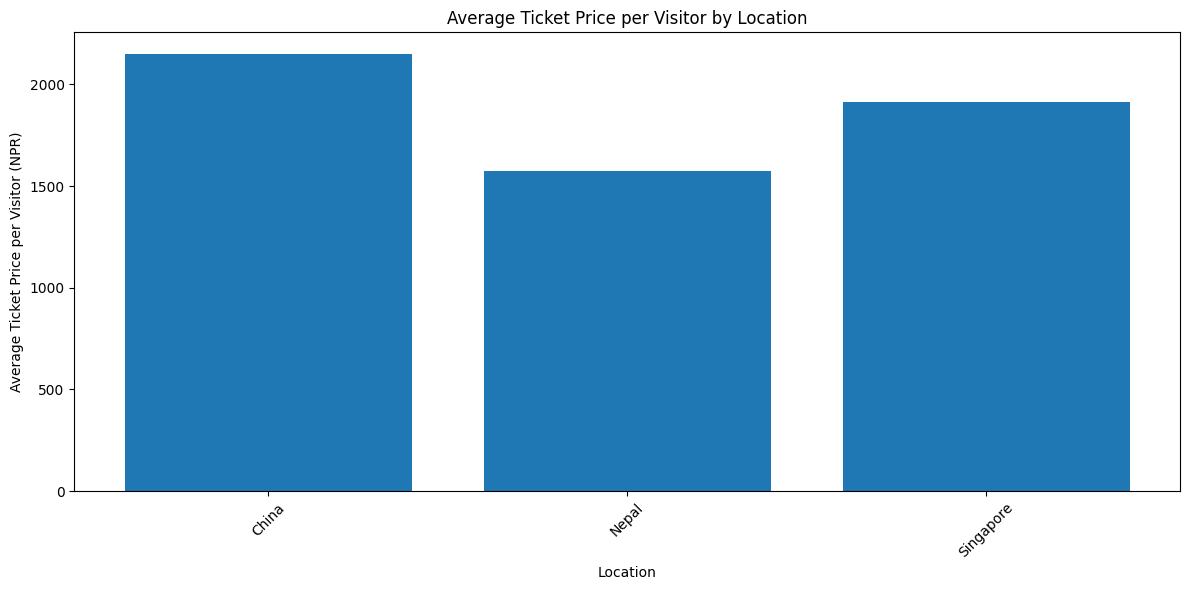

In [185]:
# Visualize location and ticket price per visitor using a bar chart
import matplotlib.pyplot as plt

# Calculate the average ticket price per location
avg_ticket_price_by_location =data.groupby('Location')['Ticket Price per Visitor'].mean().reset_index()

# Plot the average ticket price per location
plt.figure(figsize=(12, 6))
plt.bar(avg_ticket_price_by_location['Location'], avg_ticket_price_by_location['Ticket Price per Visitor'])
plt.title('Average Ticket Price per Visitor by Location')
plt.xlabel('Location')
plt.ylabel('Average Ticket Price per Visitor (NPR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate total sales in all locations
data['Total Sales'] = data['Ticket Price per Visitor'] * data['No of Visitors']
total_sales_by_location = data.groupby('Location')['Total Sales'].sum().reset_index()



In [186]:
total_sales_by_location.head()

,Location,Total Sales
0,China,288165700
1,Nepal,214144700
2,Singapore,260932200


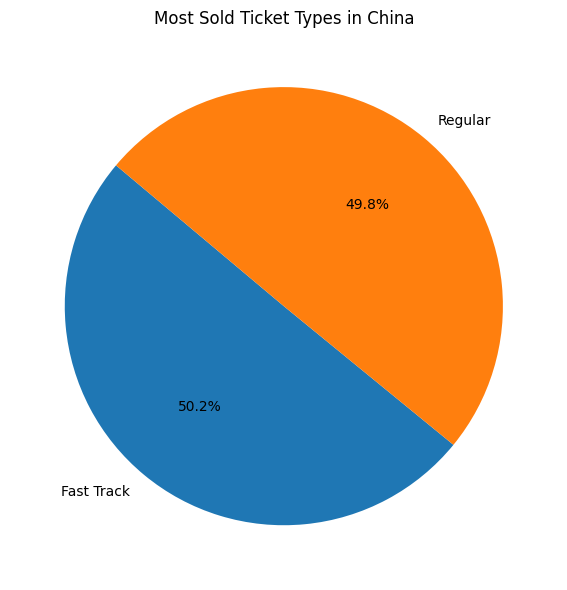

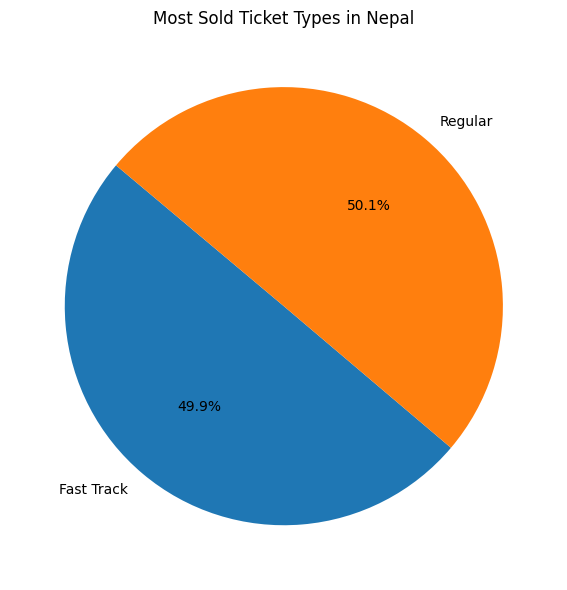

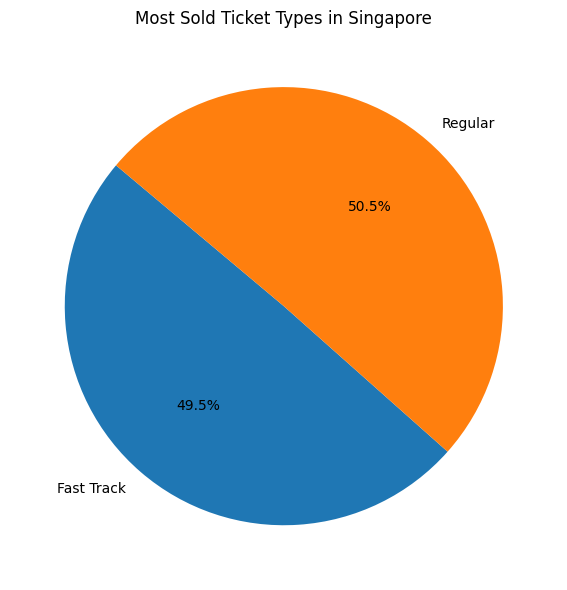

In [187]:
# Calculate the most sold ticket type in every location
most_sold_ticket_type = data.groupby(['Location', 'Ticket Type']).size().reset_index(name='Count')

# Display a pie chart for each location
locations = most_sold_ticket_type['Location'].unique()

for location in locations:
    location_data = most_sold_ticket_type[most_sold_ticket_type['Location'] == location]
    
    plt.figure(figsize=(8, 6))
    plt.pie(location_data['Count'], labels=location_data['Ticket Type'], autopct='%1.1f%%', startangle=140)
    plt.title(f"Most Sold Ticket Types in {location}")
    plt.tight_layout()
    plt.show()
 

In [188]:
most_sold_ticket_type.head()

,Location,Ticket Type,Count
0,China,Fast Track,11735
1,China,Regular,11640
2,Nepal,Fast Track,11744
3,Nepal,Regular,11781
4,Singapore,Fast Track,11705


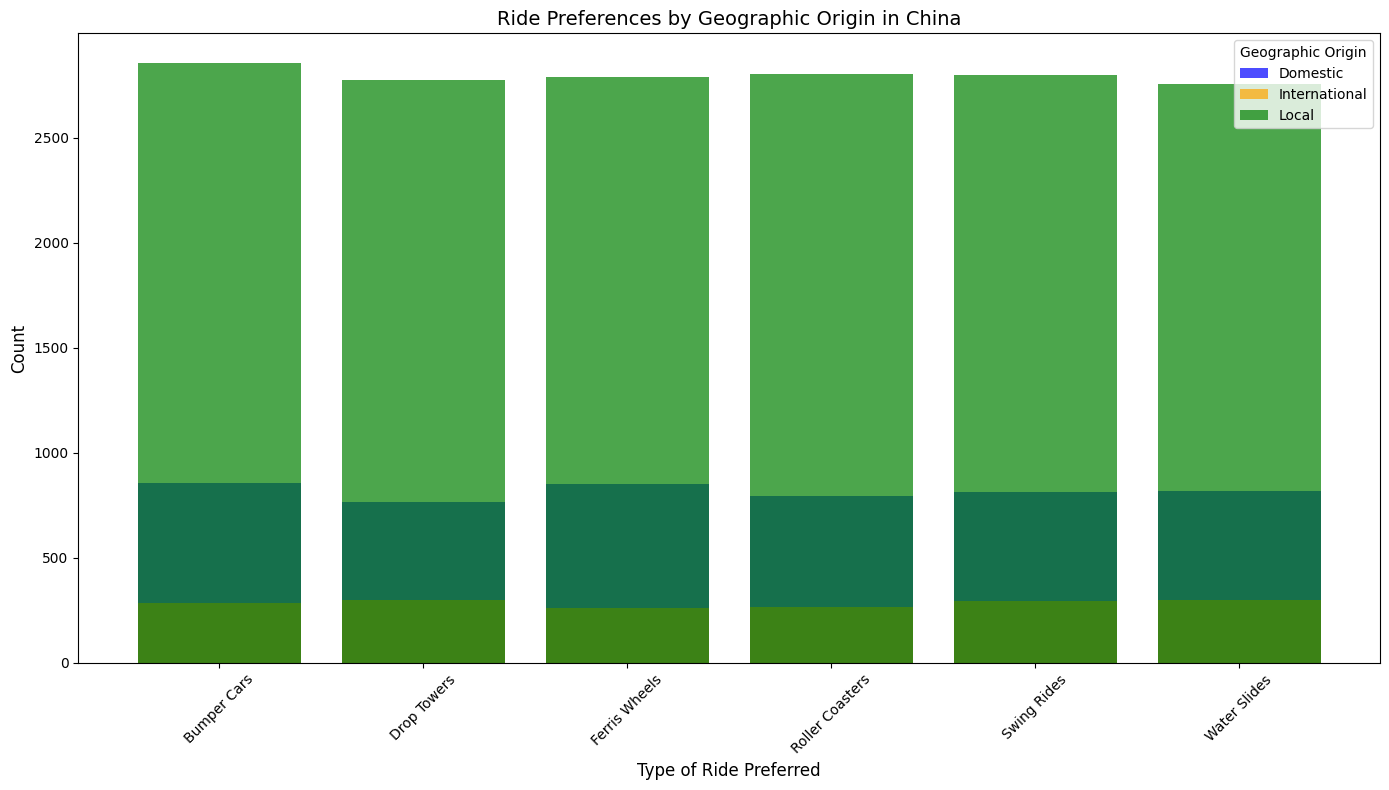

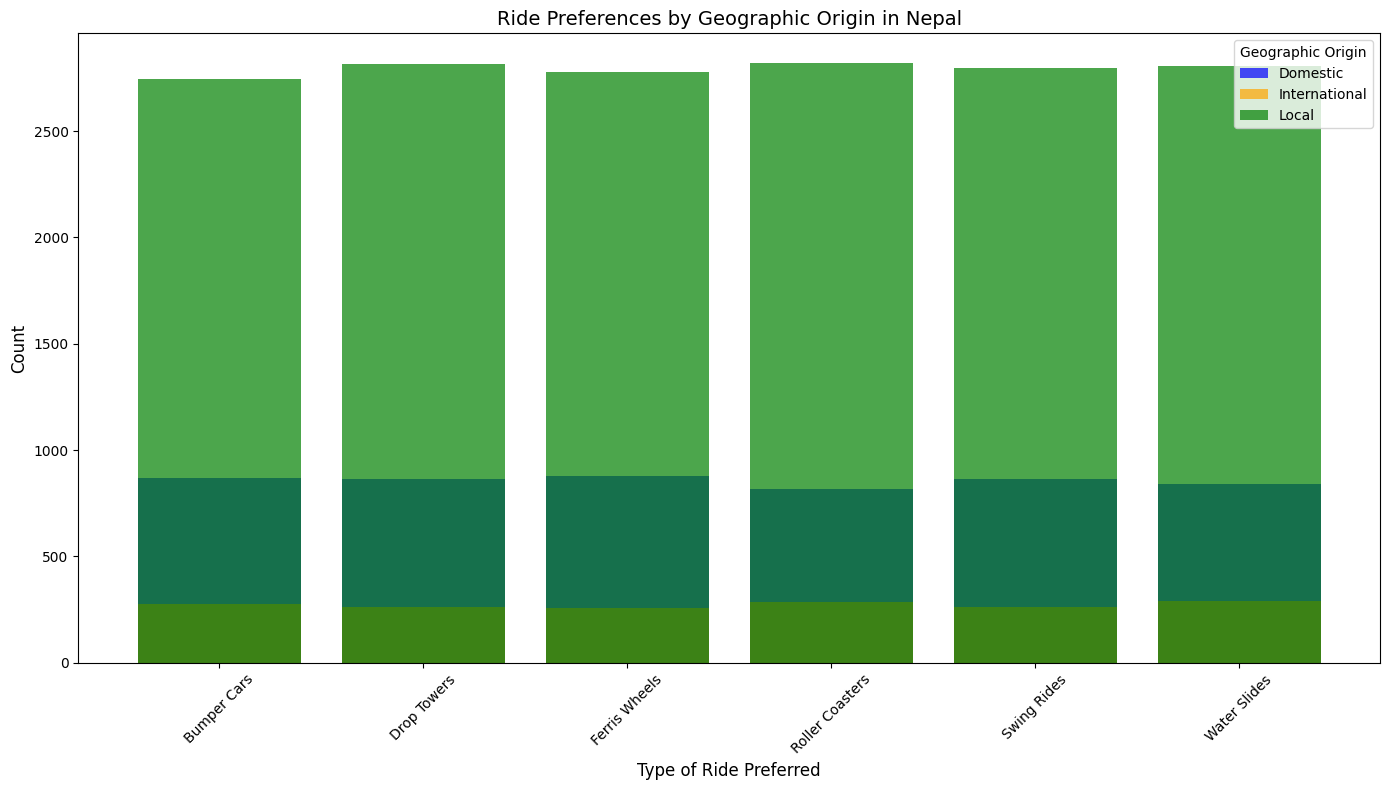

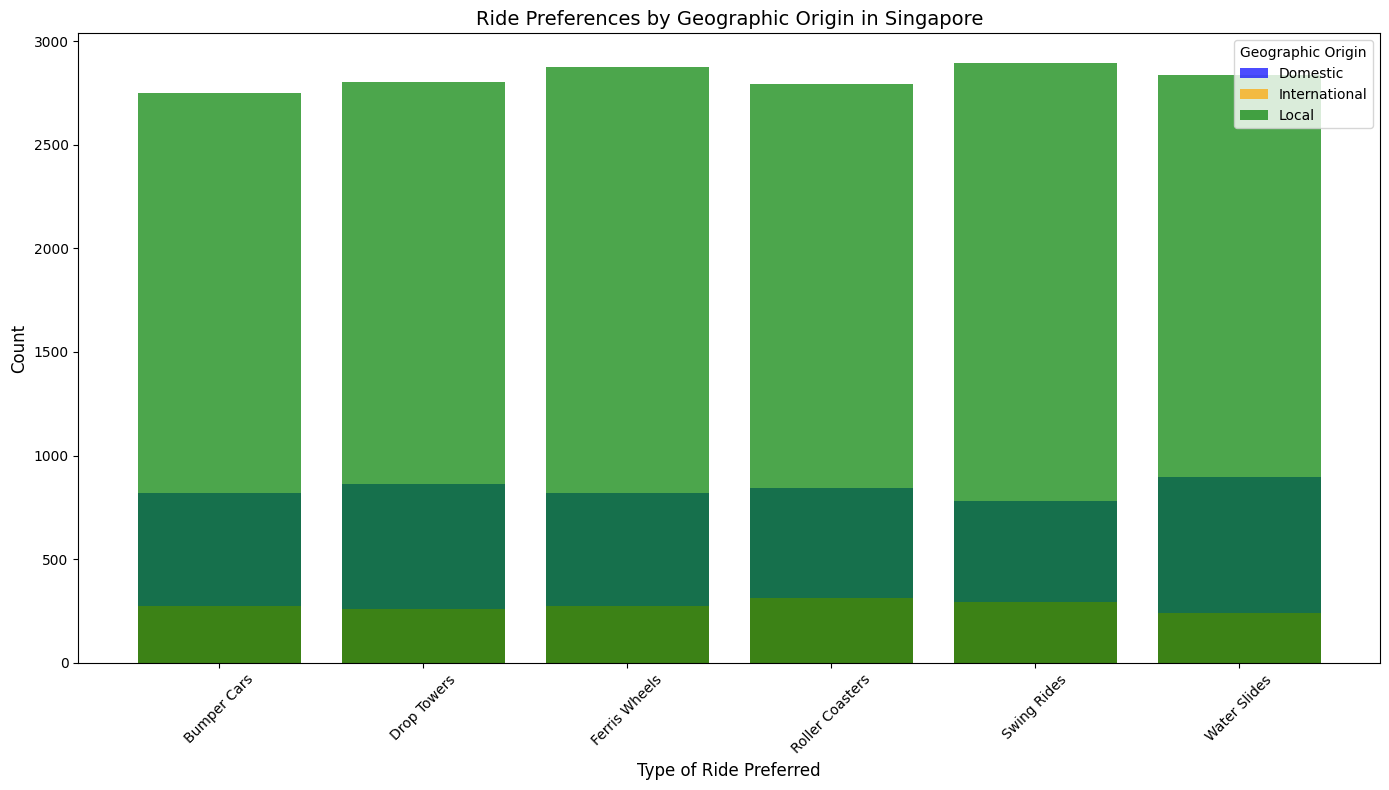

In [189]:
import matplotlib.pyplot as plt

# Define distinct colors for the origins
colors = {
    "Domestic": "blue",
    "International": "orange",
    "Local": "green"
}

# Plot separate bar charts for ride preferences by geographic origin for each location
locations =data['Location'].unique()

for location in locations:
    location_data = data[data['Location'] == location]
    ride_preference_by_origin = location_data.groupby(['Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

    plt.figure(figsize=(14, 8))
    for origin in ride_preference_by_origin['Geographic_Origin'].unique():
        origin_data = ride_preference_by_origin[ride_preference_by_origin['Geographic_Origin'] == origin]
        plt.bar(
            origin_data['Type_of_Ride_Preferred'], 
            origin_data['Count'], 
            label=origin, 
            alpha=0.7, 
            color=colors[origin]  # Explicitly use assigned colors
        )
    
    plt.title(f'Ride Preferences by Geographic Origin in {location}', fontsize=14)
    plt.xlabel('Type of Ride Preferred', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title='Geographic Origin', fontsize=10)
    plt.tight_layout()
    plt.show()


In [190]:
# Calculate preferences for types of rides based on geographic origin
ride_preference_by_origin = data.groupby(['Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

print(ride_preference_by_origin)

   Geographic_Origin Type_of_Ride_Preferred  Count
0           Domestic            Bumper Cars   2548
1           Domestic            Drop Towers   2488
2           Domestic          Ferris Wheels   2547
3           Domestic        Roller Coasters   2458
4           Domestic            Swing Rides   2454
5           Domestic           Water Slides   2553
6      International            Bumper Cars    829
7      International            Drop Towers    822
8      International          Ferris Wheels    793
9      International        Roller Coasters    862
10     International            Swing Rides    849
11     International           Water Slides    831
12             Local            Bumper Cars   8347
13             Local            Drop Towers   8396
14             Local          Ferris Wheels   8448
15             Local        Roller Coasters   8416
16             Local            Swing Rides   8486
17             Local           Water Slides   8396


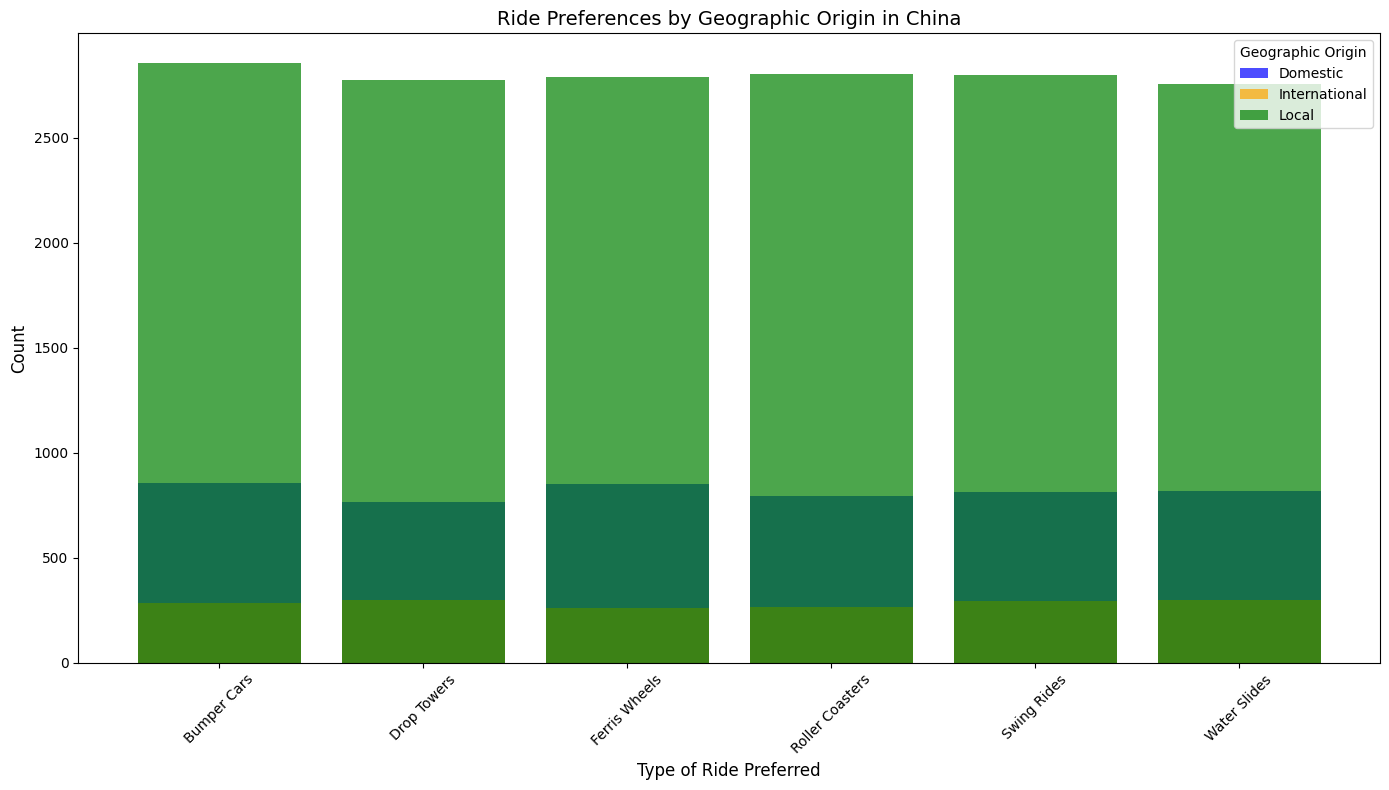

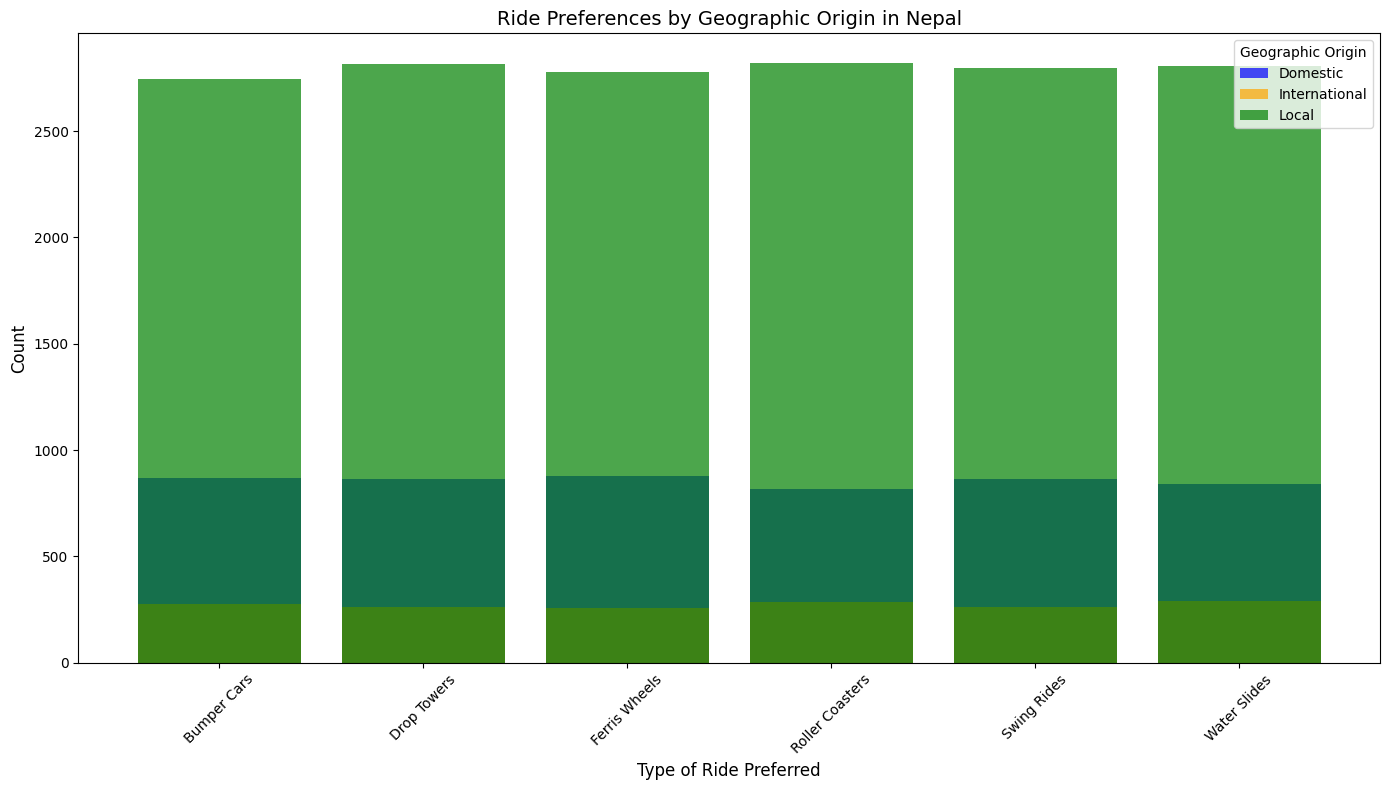

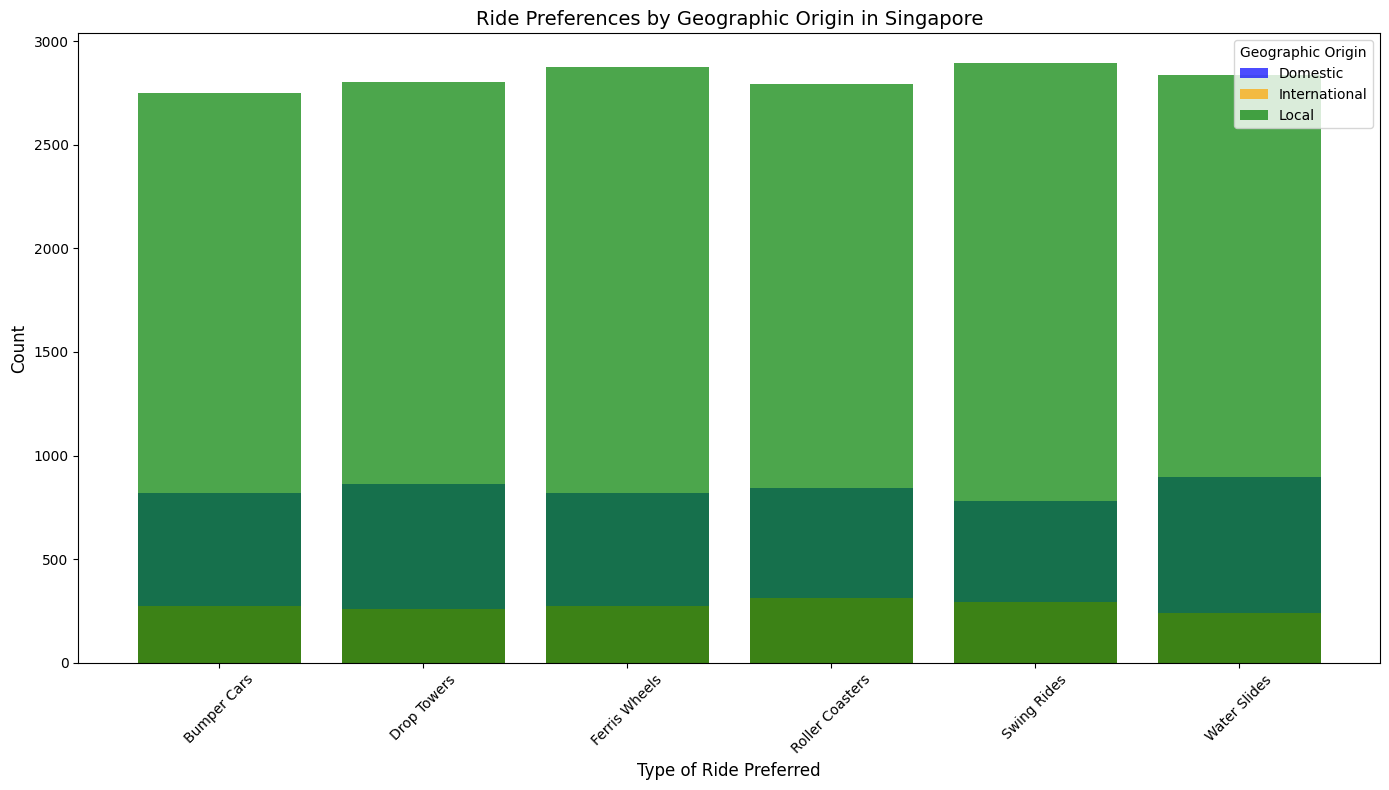

 Location Geographic_Origin Type_of_Ride_Preferred  Count
    China          Domestic            Bumper Cars    856
    China          Domestic            Drop Towers    765
    China          Domestic          Ferris Wheels    850
    China          Domestic        Roller Coasters    796
    China          Domestic            Swing Rides    813
    China          Domestic           Water Slides    816
    China     International            Bumper Cars    283
    China     International            Drop Towers    300
    China     International          Ferris Wheels    262
    China     International        Roller Coasters    266
    China     International            Swing Rides    293
    China     International           Water Slides    297
    China             Local            Bumper Cars   2854
    China             Local            Drop Towers   2776
    China             Local          Ferris Wheels   2791
    China             Local        Roller Coasters   2805
    China     

In [191]:
import matplotlib.pyplot as plt

# Define distinct colors for the origins
colors = {
    "Domestic": "blue",
    "International": "orange",
    "Local": "green"
}

# Plot separate bar charts for ride preferences by geographic origin for each location
locations = data['Location'].unique()

for location in locations:
    location_data = data[data['Location'] == location]
    ride_preference_by_origin = location_data.groupby(['Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

    plt.figure(figsize=(14, 8))
    for origin in ride_preference_by_origin['Geographic_Origin'].unique():
        origin_data = ride_preference_by_origin[ride_preference_by_origin['Geographic_Origin'] == origin]
        plt.bar(
            origin_data['Type_of_Ride_Preferred'], 
            origin_data['Count'], 
            label=origin, 
            alpha=0.7, 
            color=colors.get(origin, "gray")  # Use assigned colors, default to gray if origin not found
        )
    
    plt.title(f'Ride Preferences by Geographic Origin in {location}', fontsize=14)
    plt.xlabel('Type of Ride Preferred', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title='Geographic Origin', fontsize=10)
    plt.tight_layout()
    plt.show()

# Calculate preferences for types of rides based on geographic origin
ride_preference_by_origin = data.groupby(['Location', 'Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

# Print the table summarizing ride preferences by geographic origin
print(ride_preference_by_origin.to_string(index=False))


In [192]:
# Assuming `data` is your dataset and contains the necessary columns.

# Group data by Location, Geographic Origin, and Type of Ride Preferred
ride_preference_summary = data.groupby(['Location', 'Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

# Find the highest and lowest preferences for all locations and all geographic origins
highest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmax()]
lowest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmin()]

# Print highest and lowest preferences
print("Highest Preferences by Location and Geographic Origin:")
print(highest_preferences.to_string(index=False))

print("\nLowest Preferences by Location and Geographic Origin:")
print(lowest_preferences.to_string(index=False))


Highest Preferences by Location and Geographic Origin:
 Location Geographic_Origin Type_of_Ride_Preferred  Count
    China          Domestic            Bumper Cars    856
    China     International            Drop Towers    300
    China             Local            Bumper Cars   2854
    Nepal          Domestic          Ferris Wheels    876
    Nepal     International           Water Slides    292
    Nepal             Local        Roller Coasters   2819
Singapore          Domestic           Water Slides    897
Singapore     International        Roller Coasters    312
Singapore             Local            Swing Rides   2893

Lowest Preferences by Location and Geographic Origin:
 Location Geographic_Origin Type_of_Ride_Preferred  Count
    China          Domestic            Drop Towers    765
    China     International          Ferris Wheels    262
    China             Local           Water Slides   2755
    Nepal          Domestic        Roller Coasters    819
    Nepal     Intern

In [193]:
# Assuming `data` is your dataset and contains the necessary columns.

# Group data by Location, Geographic Origin, and Type of Ride Preferred
ride_preference_summary = data.groupby(['Location', 'Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

# Find the highest and lowest preferences for all locations and all geographic origins
highest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmax()]
lowest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmin()]

# Display the first few rows of the highest and lowest preferences
print("Highest Preferences by Location and Geographic Origin (Top Rows):")
print(highest_preferences.head().to_string(index=False))

print("\nLowest Preferences by Location and Geographic Origin (Top Rows):")
print(lowest_preferences.head().to_string(index=False))


Highest Preferences by Location and Geographic Origin (Top Rows):
Location Geographic_Origin Type_of_Ride_Preferred  Count
   China          Domestic            Bumper Cars    856
   China     International            Drop Towers    300
   China             Local            Bumper Cars   2854
   Nepal          Domestic          Ferris Wheels    876
   Nepal     International           Water Slides    292

Lowest Preferences by Location and Geographic Origin (Top Rows):
Location Geographic_Origin Type_of_Ride_Preferred  Count
   China          Domestic            Drop Towers    765
   China     International          Ferris Wheels    262
   China             Local           Water Slides   2755
   Nepal          Domestic        Roller Coasters    819
   Nepal     International          Ferris Wheels    259


In [194]:
highest_preferences.head()

,Location,Geographic_Origin,Type_of_Ride_Preferred,Count
0,China,Domestic,Bumper Cars,856
7,China,International,Drop Towers,300
12,China,Local,Bumper Cars,2854
20,Nepal,Domestic,Ferris Wheels,876
29,Nepal,International,Water Slides,292


In [195]:
lowest_preferences.head()

,Location,Geographic_Origin,Type_of_Ride_Preferred,Count
1,China,Domestic,Drop Towers,765
8,China,International,Ferris Wheels,262
17,China,Local,Water Slides,2755
21,Nepal,Domestic,Roller Coasters,819
26,Nepal,International,Ferris Wheels,259


In [196]:
 # Assuming `data` is your dataset and contains the necessary columns.

# Group data by Location, Geographic Origin, and Type of Ride Preferred
ride_preference_summary = data.groupby(['Location', 'Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

# Find the highest preferences for each Location and Geographic Origin
highest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmax()]

# Find the lowest preferences for each Location and Geographic Origin
lowest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmin()]

# Display the first few rows for highest and lowest preferences
print("Highest Preferences by Location and Geographic Origin:")
print(highest_preferences.to_string(index=False))

print("\nLowest Preferences by Location and Geographic Origin:")
print(lowest_preferences.to_string(index=False))


Highest Preferences by Location and Geographic Origin:
 Location Geographic_Origin Type_of_Ride_Preferred  Count
    China          Domestic            Bumper Cars    856
    China     International            Drop Towers    300
    China             Local            Bumper Cars   2854
    Nepal          Domestic          Ferris Wheels    876
    Nepal     International           Water Slides    292
    Nepal             Local        Roller Coasters   2819
Singapore          Domestic           Water Slides    897
Singapore     International        Roller Coasters    312
Singapore             Local            Swing Rides   2893

Lowest Preferences by Location and Geographic Origin:
 Location Geographic_Origin Type_of_Ride_Preferred  Count
    China          Domestic            Drop Towers    765
    China     International          Ferris Wheels    262
    China             Local           Water Slides   2755
    Nepal          Domestic        Roller Coasters    819
    Nepal     Intern

In [197]:
print("\nLowest Preferences by Location and Geographic Origin:")
print(lowest_preferences.head().to_string(index=False))


Lowest Preferences by Location and Geographic Origin:
Location Geographic_Origin Type_of_Ride_Preferred  Count
   China          Domestic            Drop Towers    765
   China     International          Ferris Wheels    262
   China             Local           Water Slides   2755
   Nepal          Domestic        Roller Coasters    819
   Nepal     International          Ferris Wheels    259


In [198]:
# Assuming `data` is your dataset and contains the necessary columns.

# Group data by Location, Geographic Origin, and Type of Ride Preferred
ride_preference_summary = data.groupby(['Location', 'Geographic_Origin', 'Type_of_Ride_Preferred']).size().reset_index(name='Count')

# Find the highest preferences for each Location and Geographic Origin
highest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmax()]

# Find the lowest preferences for each Location and Geographic Origin
lowest_preferences = ride_preference_summary.loc[ride_preference_summary.groupby(['Location', 'Geographic_Origin'])['Count'].idxmin()]




In [199]:
highest_preferences.head()

,Location,Geographic_Origin,Type_of_Ride_Preferred,Count
0,China,Domestic,Bumper Cars,856
7,China,International,Drop Towers,300
12,China,Local,Bumper Cars,2854
20,Nepal,Domestic,Ferris Wheels,876
29,Nepal,International,Water Slides,292


In [200]:
lowest_preferences.head()

,Location,Geographic_Origin,Type_of_Ride_Preferred,Count
1,China,Domestic,Drop Towers,765
8,China,International,Ferris Wheels,262
17,China,Local,Water Slides,2755
21,Nepal,Domestic,Roller Coasters,819
26,Nepal,International,Ferris Wheels,259


In [201]:
# Ensure the 'Date' column is in string format before filtering
data['Date'] = data['Date'].astype(str)

# Filter data for the year 2023
data_2023 = data[data['Date'].str.contains('2023', na=False)]

# Group data by Location and Ticket Type for the entire dataset
highest_sold_tickets_all_years = data.groupby(['Location', 'Ticket Type']).size().reset_index(name='Count')
highest_sold_tickets_all_years = highest_sold_tickets_all_years.sort_values(['Location', 'Count'], ascending=[True, False])

# Find the highest and lowest sold ticket types for all years
highest_all_years = highest_sold_tickets_all_years.groupby('Location').first().reset_index()
lowest_all_years = highest_sold_tickets_all_years.groupby('Location').last().reset_index()

# Group data by Location and Ticket Type for 2023
highest_sold_tickets_2023 = data_2023.groupby(['Location', 'Ticket Type']).size().reset_index(name='Count')
highest_sold_tickets_2023 = highest_sold_tickets_2023.sort_values(['Location', 'Count'], ascending=[True, False])

# Find the highest and lowest sold ticket types for 2023
highest_2023 = highest_sold_tickets_2023.groupby('Location').first().reset_index()
lowest_2023 = highest_sold_tickets_2023.groupby('Location').last().reset_index()



In [202]:

# Print the results
print("Highest Sold Ticket Types (All Years):")
highest_all_years.head()


Highest Sold Ticket Types (All Years):


,Location,Ticket Type,Count
0,China,Fast Track,11735
1,Nepal,Regular,11781
2,Singapore,Regular,11918


In [203]:
print("\nLowest Sold Ticket Types (All Years):")
lowest_all_years.head()



Lowest Sold Ticket Types (All Years):


,Location,Ticket Type,Count
0,China,Regular,11640
1,Nepal,Fast Track,11744
2,Singapore,Fast Track,11705


In [204]:
print("\nHighest Sold Ticket Types (2023):")
highest_2023.head()



Highest Sold Ticket Types (2023):


,Location,Ticket Type,Count
0,China,Fast Track,2730
1,Nepal,Regular,2757
2,Singapore,Regular,2702


In [205]:
print("\nLowest Sold Ticket Types (2023):")
lowest_2023.head()


Lowest Sold Ticket Types (2023):


,Location,Ticket Type,Count
0,China,Regular,2662
1,Nepal,Fast Track,2683
2,Singapore,Fast Track,2622


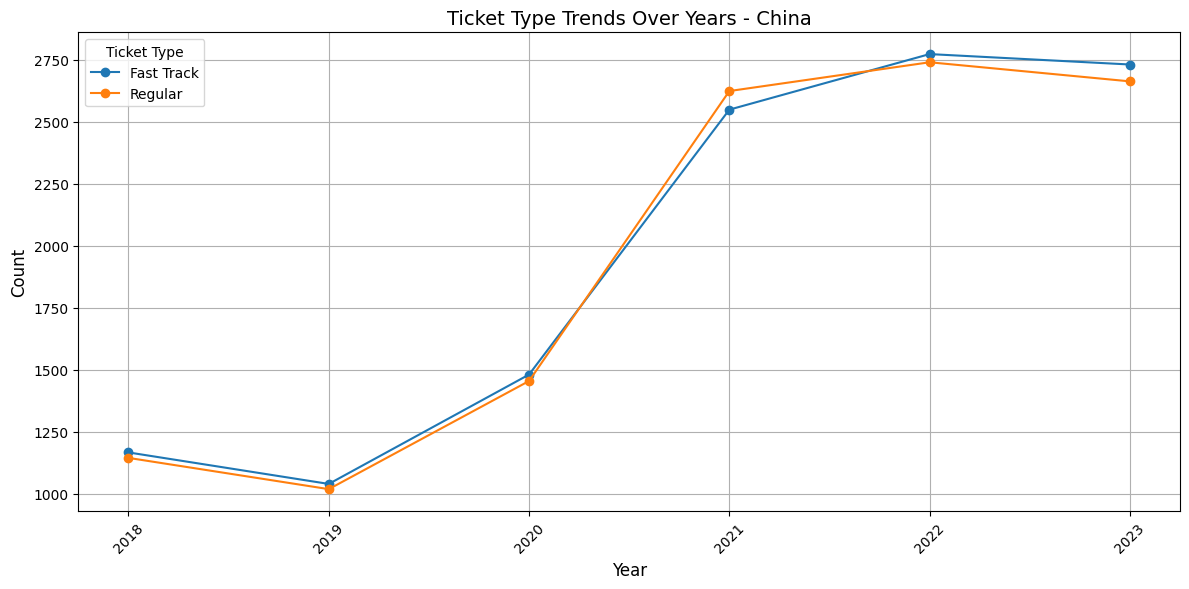

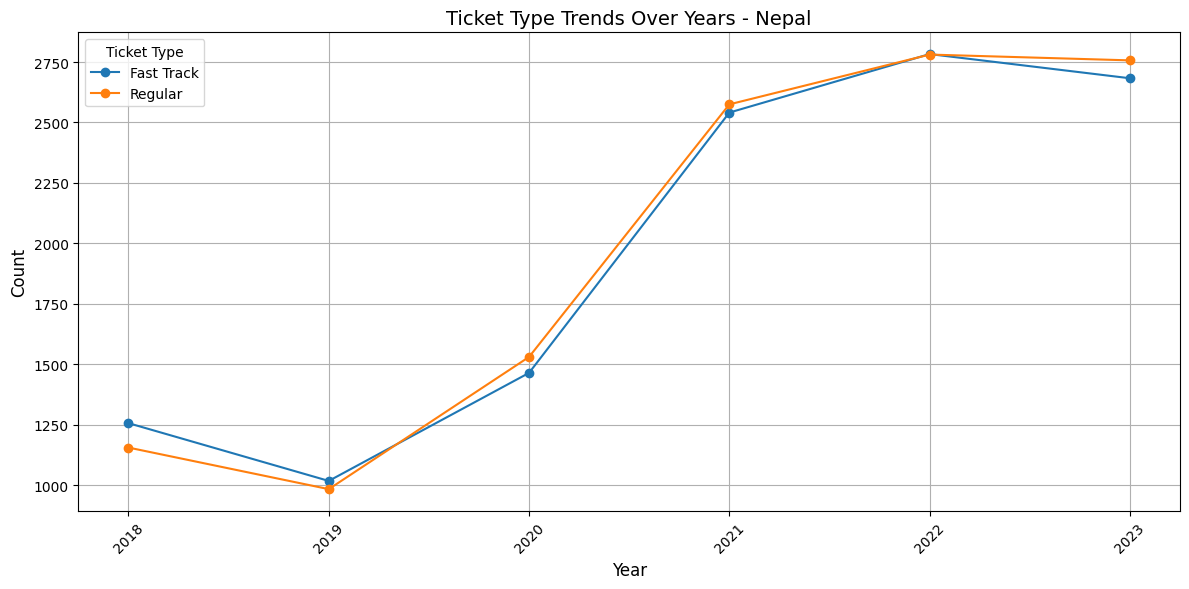

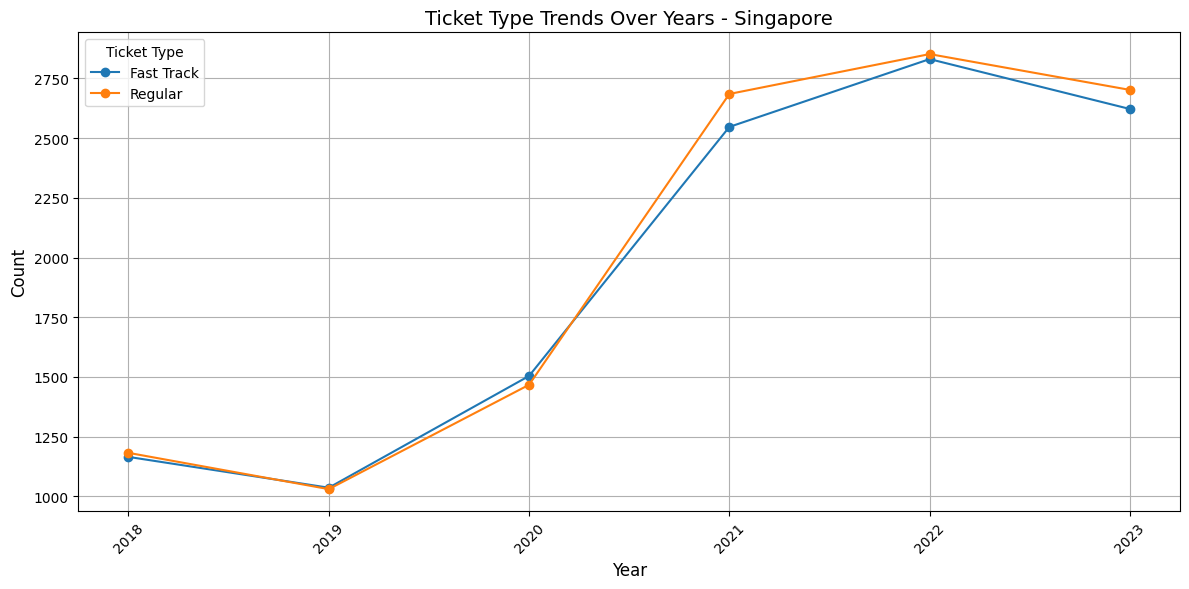

In [206]:
# Extract year from the 'Date' column
data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year

# Group by year, location, and ticket type to calculate trends
ticket_type_trends = data.groupby(['Year', 'Location', 'Ticket Type']).size().reset_index(name='Count')

# Plot trends for each location
locations = data['Location'].unique()

for location in locations:
    location_data = ticket_type_trends[ticket_type_trends['Location'] == location]
    plt.figure(figsize=(12, 6))
    
    for ticket_type in location_data['Ticket Type'].unique():
        ticket_type_data = location_data[location_data['Ticket Type'] == ticket_type]
        plt.plot(ticket_type_data['Year'], ticket_type_data['Count'], marker='o', label=ticket_type)
    
    plt.title(f'Ticket Type Trends Over Years - {location}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(location_data['Year'].unique(), rotation=45, fontsize=10)
    plt.legend(title='Ticket Type', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()